In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
bach_chords = pd.read_csv('chords/chords-chordino_01_bach.csv')

In [3]:
bach_chords.head()

,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_emin.mp3,0.000000000,N
0,NaN,0.4,E_min
1,NaN,4.1,B_maj_min7
2,NaN,8.0,E_min_min7
3,NaN,17.1,G_maj_maj7
4,NaN,22.1,A_min_min7


In [4]:
bach_chords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12474 entries, 0 to 12473
Data columns (total 3 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   01_bach/CrossComp-0055_01_bach_10_bwv_879_in_emin.mp3  99 non-null     object 
 1   0.000000000                                            12474 non-null  float64
 2   N                                                      12474 non-null  object 
dtypes: float64(1), object(2)
memory usage: 292.5+ KB


In [5]:
bach_chords.ffill(inplace = True)

In [6]:
bach_chords.columns[0]

'01_bach/CrossComp-0055_01_bach_10_bwv_879_in_emin.mp3'

In [7]:
bach_chords.fillna(value = {bach_chords.columns[0]: bach_chords.columns[0]}, inplace = True)

In [8]:
bach_chords.rename(columns = {bach_chords.columns[0]: 'track'}, inplace = True)

In [9]:
bach_chords

,track,0.000000000,N
0,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,0.4,E_min
1,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,4.1,B_maj_min7
2,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,8.0,E_min_min7
3,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,17.1,G_maj_maj7
4,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,22.1,A_min_min7
...,...,...,...
12469,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,233.5,G_maj
12470,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,234.8,D_maj
12471,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,236.3,G_maj
12472,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,241.7,N


In [10]:
bach_chords['0.000000000'] = bach_chords['0.000000000'].apply(np.ceil)

In [11]:
bach_chords

,track,0.000000000,N
0,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,1.0,E_min
1,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,5.0,B_maj_min7
2,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,8.0,E_min_min7
3,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,18.0,G_maj_maj7
4,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,23.0,A_min_min7
...,...,...,...
12469,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,234.0,G_maj
12470,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,235.0,D_maj
12471,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,237.0,G_maj
12472,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,242.0,N


I need a column that is the how many seconds the chord sounds for

In [12]:
bach_chords['chord_length'] = bach_chords['0.000000000'].diff().shift(-1)

In [13]:
bach_chords

,track,0.000000000,N,chord_length
0,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,1.0,E_min,4.0
1,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,5.0,B_maj_min7,3.0
2,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,8.0,E_min_min7,10.0
3,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,18.0,G_maj_maj7,5.0
4,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,23.0,A_min_min7,6.0
...,...,...,...,...
12469,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,234.0,G_maj,1.0
12470,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,235.0,D_maj,2.0
12471,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,237.0,G_maj,5.0
12472,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,242.0,N,10.0


In [14]:
bach_chords[bach_chords.chord_length < 1]

,track,0.000000000,N,chord_length
12,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,56.0,G_maj_maj7,0.0
22,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,102.0,E_maj_min7,0.0
55,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,196.0,B_maj_min7,0.0
137,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,443.0,N,-443.0
219,01_bach/CrossComp-0056_01_bach_11_bwv_880_in_f...,215.0,C_maj_min7,0.0
...,...,...,...,...
12314,01_bach/CrossComp-0070_01_bach_trio_cmoll_bwv_...,216.0,Bb_maj,0.0
12328,01_bach/CrossComp-0070_01_bach_trio_cmoll_bwv_...,252.0,F_maj_min7,0.0
12350,01_bach/CrossComp-0070_01_bach_trio_cmoll_bwv_...,298.0,C_min_min7,0.0
12388,01_bach/CrossComp-0070_01_bach_trio_cmoll_bwv_...,384.0,N,-384.0


replacing all the ending chords and chords that are shorter than a second with one second

In [15]:
bach_chords.loc[bach_chords['chord_length'] < 1, 'chord_length'] = 1

In [16]:
bach_chords[bach_chords.chord_length < 1]

,track,0.000000000,N,chord_length


In [17]:
bach_chords

,track,0.000000000,N,chord_length
0,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,1.0,E_min,4.0
1,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,5.0,B_maj_min7,3.0
2,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,8.0,E_min_min7,10.0
3,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,18.0,G_maj_maj7,5.0
4,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,23.0,A_min_min7,6.0
...,...,...,...,...
12469,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,234.0,G_maj,1.0
12470,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,235.0,D_maj,2.0
12471,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,237.0,G_maj,5.0
12472,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,242.0,N,10.0


In [18]:
bach_chords.chord_length.fillna(1, inplace = True)

In [19]:
bach_chords

,track,0.000000000,N,chord_length
0,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,1.0,E_min,4.0
1,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,5.0,B_maj_min7,3.0
2,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,8.0,E_min_min7,10.0
3,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,18.0,G_maj_maj7,5.0
4,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,23.0,A_min_min7,6.0
...,...,...,...,...
12469,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,234.0,G_maj,1.0
12470,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,235.0,D_maj,2.0
12471,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,237.0,G_maj,5.0
12472,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,242.0,N,10.0


Now I need a column with the chord (N) printed chord_length number of times

In [20]:
bach_chords.N = bach_chords.N + ' '

In [21]:
bach_chords['chord_w_length'] = bach_chords.N.str.repeat(bach_chords.chord_length.astype(int))

In [22]:
bach_chords

,track,0.000000000,N,chord_length,chord_w_length
0,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,1.0,E_min,4.0,E_min E_min E_min E_min
1,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,5.0,B_maj_min7,3.0,B_maj_min7 B_maj_min7 B_maj_min7
2,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,8.0,E_min_min7,10.0,E_min_min7 E_min_min7 E_min_min7 E_min_min7 E_...
3,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,18.0,G_maj_maj7,5.0,G_maj_maj7 G_maj_maj7 G_maj_maj7 G_maj_maj7 G_...
4,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,23.0,A_min_min7,6.0,A_min_min7 A_min_min7 A_min_min7 A_min_min7 A_...
...,...,...,...,...,...
12469,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,234.0,G_maj,1.0,G_maj
12470,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,235.0,D_maj,2.0,D_maj D_maj
12471,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,237.0,G_maj,5.0,G_maj G_maj G_maj G_maj G_maj
12472,01_bach/CrossComp-0071_01_bach_trio_gdur_bwv_5...,242.0,N,10.0,N N N N N N N N N N


For each track, I want a document of all of the chords in a row

In [23]:
pieces = bach_chords.track.unique()

In [24]:
df = pd.DataFrame(pieces, columns = ['track'])
df

,track
0,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...
1,01_bach/CrossComp-0056_01_bach_11_bwv_880_in_f...
2,01_bach/CrossComp-0057_01_bach_12_bwv_881_in_f...
3,01_bach/CrossComp-0058_01_bach_13_bwv_882_in_f...
4,01_bach/CrossComp-0059_01_bach_14_bwv_883_in_f...
...,...
95,01_bach/CrossComp-0081_01_bach_schwingt_freudi...
96,01_bach/CrossComp-0083_01_bach_schwingt_freudi...
97,01_bach/CrossComp-0079_01_bach_schwingt_freudi...
98,01_bach/CrossComp-0070_01_bach_trio_cmoll_bwv_...


In [25]:
def make_document(track):
    result = ''
    df1 = bach_chords[bach_chords.track == track]
    for row in df1.chord_w_length:
        result += row
    return result

In [26]:
df['chords'] = df.track.apply(make_document)

In [27]:
df

,track,chords
0,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,E_min E_min E_min E_min B_maj_min7 B_maj_min7 ...
1,01_bach/CrossComp-0056_01_bach_11_bwv_880_in_f...,N F_maj_maj7 F_maj_maj7 Bb_maj_maj7 E_dim_min7...
2,01_bach/CrossComp-0057_01_bach_12_bwv_881_in_f...,N F_min C_maj_min7 C_maj_min7 F_min F_min Eb_m...
3,01_bach/CrossComp-0058_01_bach_13_bwv_882_in_f...,N Eb_min_min7 Eb_min_min7 Eb_min_min7 Eb_min_m...
4,01_bach/CrossComp-0059_01_bach_14_bwv_883_in_f...,N F#_min F#_min F#_min F#_min F#_min F#_min F#...
...,...,...
95,01_bach/CrossComp-0081_01_bach_schwingt_freudi...,N C#_maj_maj7 C#_maj_maj7 C#_maj_maj7 Eb_min_m...
96,01_bach/CrossComp-0083_01_bach_schwingt_freudi...,N C#_maj Ab_maj Bb_min_min7 Bb_min_min7 Bb_min...
97,01_bach/CrossComp-0079_01_bach_schwingt_freudi...,N C#_maj C#_maj Eb_min_min7 Bb_min_min7 Bb_min...
98,01_bach/CrossComp-0070_01_bach_trio_cmoll_bwv_...,N N N C_min C_min C_min C_min C_min C_min C_mi...


I have done this for bach, now I need to do it for my other composers

In [28]:
def clean_data(composer_csv):
    """
    Takes in a dataframe from a csv and conerts it into the form needed for analysis
    """
    composer_csv.ffill(inplace = True)
    composer_csv.fillna(value = {composer_csv.columns[0]: composer_csv.columns[0]}, inplace = True)
    composer_csv.rename(columns = {composer_csv.columns[0]: 'track'}, inplace = True)
    composer_csv['0.000000000'] =  composer_csv['0.000000000'].apply(np.ceil)
    composer_csv['chord_length'] = composer_csv['0.000000000'].diff().shift(-1)
    composer_csv.loc[composer_csv['chord_length'] < 1, 'chord_length'] = 1
    composer_csv.chord_length.fillna(1, inplace = True)
    composer_csv.N = composer_csv.N + ' '
    composer_csv['chord_w_length'] = composer_csv.N.str.repeat(composer_csv.chord_length.astype(int))
    
    pieces = composer_csv.track.unique()
    df = pd.DataFrame(pieces, columns = ['track'])
    
    def make_document(track):
        result = ''
        df1 = composer_csv[composer_csv.track == track]
        for row in df1.chord_w_length:
            result += row
        return result
    df['chords'] = df.track.apply(make_document)
    
    return df

bach

In [29]:
bach = pd.read_csv('chords/chords-chordino_01_bach.csv')

bach_df = clean_data(bach)

bach_df['composer'] = 'bach'

bach_df

,track,chords,composer
0,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,E_min E_min E_min E_min B_maj_min7 B_maj_min7 ...,bach
1,01_bach/CrossComp-0056_01_bach_11_bwv_880_in_f...,N F_maj_maj7 F_maj_maj7 Bb_maj_maj7 E_dim_min7...,bach
2,01_bach/CrossComp-0057_01_bach_12_bwv_881_in_f...,N F_min C_maj_min7 C_maj_min7 F_min F_min Eb_m...,bach
3,01_bach/CrossComp-0058_01_bach_13_bwv_882_in_f...,N Eb_min_min7 Eb_min_min7 Eb_min_min7 Eb_min_m...,bach
4,01_bach/CrossComp-0059_01_bach_14_bwv_883_in_f...,N F#_min F#_min F#_min F#_min F#_min F#_min F#...,bach
...,...,...,...
95,01_bach/CrossComp-0081_01_bach_schwingt_freudi...,N C#_maj_maj7 C#_maj_maj7 C#_maj_maj7 Eb_min_m...,bach
96,01_bach/CrossComp-0083_01_bach_schwingt_freudi...,N C#_maj Ab_maj Bb_min_min7 Bb_min_min7 Bb_min...,bach
97,01_bach/CrossComp-0079_01_bach_schwingt_freudi...,N C#_maj C#_maj Eb_min_min7 Bb_min_min7 Bb_min...,bach
98,01_bach/CrossComp-0070_01_bach_trio_cmoll_bwv_...,N N N C_min C_min C_min C_min C_min C_min C_mi...,bach


beethoven

In [30]:
beethoven = pd.read_csv('chords/chords-chordino_02_beethoven.csv')

In [31]:
beethoven_df = clean_data(beethoven)

In [32]:
beethoven_df['composer'] = 'beethoven'

In [33]:
beethoven_df

,track,chords,composer
0,02_beethoven/CrossComp-0165_02_beethoven_10_in...,Eb_maj Eb_maj Eb_maj Eb_maj Eb_maj Bb_maj_maj7...,beethoven
1,02_beethoven/CrossComp-0170_02_beethoven_11_in...,N C_maj C_maj C_maj C_maj C_maj G_maj_min7 G_m...,beethoven
2,02_beethoven/CrossComp-0164_02_beethoven_12_in...,N F_maj F_maj A_min_min7 A_min_min7 A_min_min7...,beethoven
3,02_beethoven/CrossComp-0171_02_beethoven_1_in_...,N A_maj D_maj A_maj A_maj F#_min G_maj D_maj_m...,beethoven
4,02_beethoven/CrossComp-0172_02_beethoven_2_in_...,N Bb_maj Bb_maj F_maj_min7 Bb_maj F_maj Eb_maj...,beethoven
...,...,...,...
95,02_beethoven/CrossComp-0142_02_beethoven_tempo...,N N F_maj F_maj F_maj F_maj C_maj_min7 A_min_m...,beethoven
96,02_beethoven/CrossComp-0152_02_beethoven_the_c...,N N N C_maj C_maj C_maj G_maj G_maj G_maj C_ma...,beethoven
97,02_beethoven/CrossComp-0150_02_beethoven_traue...,N N B_min B_min B_min B_min B_min B_min F#_maj...,beethoven
98,02_beethoven/CrossComp-0145_02_beethoven_trium...,N N G_maj G_maj G_maj C_maj C_maj C_maj G_maj ...,beethoven


brahms

In [34]:
brahms = pd.read_csv('chords/chords-chordino_03_brahms.csv')

brahms_df = clean_data(brahms)

brahms_df['composer'] = 'brahms'

brahms_df

,track,chords,composer
0,03_brahms/CrossComp-0278_03_brahms_allegretto_...,C_min_min7 C_min_min7 F_maj E_dim F_maj C_min_...,brahms
1,03_brahms/CrossComp-0276_03_brahms_allegro_app...,N D_min D_min D_min Bb_maj Bb_maj Bb_maj Bb_ma...,brahms
2,03_brahms/CrossComp-0277_03_brahms_allegro_non...,N Bb_maj Bb_maj C_maj Eb_maj_maj7 Eb_maj_maj7 ...,brahms
3,03_brahms/CrossComp-0275_03_brahms_andante.mp3,N Bb_maj Bb_maj F_maj Eb_maj Eb_maj Bb_maj A_d...,brahms
4,03_brahms/CrossComp-0214_03_brahms_brahms__vie...,N D_maj F_maj_maj7 F_maj_maj7 D_maj A_maj A_ma...,brahms
...,...,...,...
95,03_brahms/CrossComp-0265_03_brahms_three_inter...,N C_dim Bb_min Bb_min C_dim_min7 Bb_min_min7 B...,brahms
96,03_brahms/CrossComp-0266_03_brahms_three_inter...,N C#_maj E_maj_maj7 Eb_min_min7 E_maj_maj7 E_m...,brahms
97,03_brahms/CrossComp-0209_03_brahms_trio_for_pi...,N N D_maj D_maj D_maj D_maj G_maj G_maj G_maj ...,brahms
98,03_brahms/CrossComp-0210_03_brahms_trio_for_pi...,N N F_maj_maj7 F_maj_maj7 F_maj_maj7 F_maj_maj...,brahms


dvorak

In [35]:
dvorak = pd.read_csv('chords/chords-chordino_04_dvorak.csv')

dvorak_df = clean_data(dvorak)

dvorak_df['composer'] = 'dvorak'

dvorak_df

,track,chords,composer
0,04_dvorak/CrossComp-0385_04_dvorak__finale_fur...,D_min A_maj_min7 A_maj_min7 A_maj_min7 D_min F...,dvorak
1,04_dvorak/CrossComp-0386_04_dvorak__polka.mp3,N D_min D_min D_min D_min D_min D_min G_min_mi...,dvorak
2,04_dvorak/CrossComp-0382_04_dvorak__romance.mp3,N G_maj G_maj G_maj G_maj G_maj G_maj A_maj_mi...,dvorak
3,04_dvorak/CrossComp-0387_04_dvorak__sousedska_...,N Bb_maj F_maj_min7 G_min G_min D_min D_min G_...,dvorak
4,04_dvorak/CrossComp-0381_04_dvorak_a_heros_son...,N Bb_min Bb_min Bb_min Bb_min Bb_min Bb_min Bb...,dvorak
...,...,...,...
95,04_dvorak/CrossComp-0307_04_dvorak_violin_sona...,N E_maj E_min_min7 E_min_min7 A_maj E_maj D_ma...,dvorak
96,04_dvorak/CrossComp-0320_04_dvorak_violin_sona...,N G_maj G_maj G_maj D_maj_min7 E_min E_min E_m...,dvorak
97,04_dvorak/CrossComp-0314_04_dvorak_violin_sona...,N G_maj G_maj G_maj C_maj G_maj G_maj G_maj D_...,dvorak
98,04_dvorak/CrossComp-0323_04_dvorak_violin_sona...,N G_min G_min G_min G_min C_min_min7 C_min_min...,dvorak


handel

In [36]:
handel = pd.read_csv('chords/chords-chordino_05_handel.csv')

handel_df = clean_data(handel)

handel_df['composer'] = 'handel'

handel_df

,track,chords,composer
0,05_handel/CrossComp-0461_05_handel_a_majoro_lo...,Ab_maj Ab_maj Eb_maj Eb_maj F_min Ab_maj Bb_mi...,handel
1,05_handel/CrossComp-0463_05_handel_a_majorthe_...,N Bb_min Bb_min Bb_min C#_maj_maj7 F#_maj_maj7...,handel
2,05_handel/CrossComp-0444_05_handel_a_majorto_t...,N F_maj F_maj Bb_min Bb_min F_maj F_maj F_maj ...,handel
3,05_handel/CrossComp-0454_05_handel_a_majorto_t...,N F_min F_min C_maj C_maj F_min G_dim_min7 C_m...,handel
4,05_handel/CrossComp-0460_05_handel_a_majorvouc...,N Ab_min Ab_min Ab_min Eb_maj Eb_maj Ab_min Ab...,handel
...,...,...,...
95,05_handel/CrossComp-0438_05_handel_the_alchimi...,N A_maj E_maj F#_min_min7 B_min_min7 B_min_min...,handel
96,05_handel/CrossComp-0422_05_handel_then_shall_...,N F#_maj F#_maj F#_maj B_aug B_aug B_aug B_maj...,handel
97,05_handel/CrossComp-0465_05_handel_toccata_in_...,N G_min G_min G_min G_min G_min D_maj_min7 Eb_...,handel
98,05_handel/CrossComp-0431_05_handel_why_do_the_...,N B_maj B_maj B_maj B_maj B_maj B_maj B_maj B_...,handel


haydn

In [37]:
haydn = pd.read_csv('chords/chords-chordino_06_haydn.csv')

haydn_df = clean_data(haydn)

haydn_df['composer'] = 'haydn'

haydn_df

,track,chords,composer
0,06_haydn/CrossComp-0530_06_haydn_finale_presto...,G_maj G_maj G_maj G_maj G_maj G_maj G_maj G_ma...,haydn
1,06_haydn/CrossComp-0504_06_haydn_i._allegretto...,N N D_maj D_maj A_maj_min7 A_maj_min7 D_maj A_...,haydn
2,06_haydn/CrossComp-0511_06_haydn_i._allegretto...,N Eb_maj Eb_maj Ab_maj Eb_maj Eb_maj Bb_maj_mi...,haydn
3,06_haydn/CrossComp-0505_06_haydn_i._allegro_co...,N N Bb_maj Bb_maj Bb_maj Bb_maj Bb_maj Bb_maj ...,haydn
4,06_haydn/CrossComp-0508_06_haydn_ii._adagio_op...,N N Eb_maj D_dim D_dim Eb_maj Eb_maj Bb_maj Eb...,haydn
...,...,...,...
95,06_haydn/CrossComp-0599_06_haydn_symphony_no.8...,N N D_maj E_min_min7 E_min_min7 E_min_min7 D_m...,haydn
96,06_haydn/CrossComp-0516_06_haydn_symphony_no.9...,N G_maj G_maj C_maj C_maj G_maj C_maj_maj7 C_m...,haydn
97,06_haydn/CrossComp-0513_06_haydn_symphony_no.9...,N G_maj_maj7 G_maj_maj7 G_maj_maj7 G_maj_maj7 ...,haydn
98,06_haydn/CrossComp-0514_06_haydn_symphony_no.9...,N C_maj C_maj C_maj C_maj D_min_min7 G_maj G_m...,haydn


mendelssohn

In [38]:
mendelssohn = pd.read_csv('chords/chords-chordino_07_mendelssohn.csv')

mendelssohn_df = clean_data(mendelssohn)

mendelssohn_df['composer'] = 'mendelssohn'

mendelssohn_df

,track,chords,composer
0,07_mendelssohn/CrossComp-0688_07_mendelssohn_0...,F_maj G_min_min7 G_min_min7 C_min D_maj D_maj ...,mendelssohn
1,07_mendelssohn/CrossComp-0697_07_mendelssohn_0...,N G_min_min7 G_min_min7 G_min_min7 D_maj G_min...,mendelssohn
2,07_mendelssohn/CrossComp-0694_07_mendelssohn_0...,N A_maj_min7 A_maj_min7 D_maj D_maj D_maj A_ma...,mendelssohn
3,07_mendelssohn/CrossComp-0699_07_mendelssohn_0...,N D_min D_min D_min D_min D_min D_min D_min G_...,mendelssohn
4,07_mendelssohn/CrossComp-0693_07_mendelssohn_0...,N D_maj D_maj D_maj D_maj D_maj D_maj G_min G_...,mendelssohn
...,...,...,...
95,07_mendelssohn/CrossComp-0602_07_mendelssohn_v...,N E_maj_maj7 E_maj_maj7 E_maj_maj7 E_maj_maj7 ...,mendelssohn
96,07_mendelssohn/CrossComp-0601_07_mendelssohn_v...,N E_min E_min E_min E_min E_min E_min A_min E_...,mendelssohn
97,07_mendelssohn/CrossComp-0603_07_mendelssohn_v...,N E_min E_min E_min E_min E_min B_maj B_maj B_...,mendelssohn
98,07_mendelssohn/CrossComp-0621_07_mendelssohn_v...,N N F_maj F_maj F_maj F_maj F_maj C_maj F_maj ...,mendelssohn


mozart

In [39]:
mozart = pd.read_csv('chords/chords-chordino_08_mozart.csv')

mozart_df = clean_data(mozart)

mozart_df['composer'] = 'mozart'

mozart_df

,track,chords,composer
0,08_mozart/CrossComp-0745_08_mozart_10_in_f_maj...,N,mozart
1,08_mozart/CrossComp-0746_08_mozart_11_in_d_maj...,N N N N N N N N N N N N N N N N N N N N N N N ...,mozart
2,08_mozart/CrossComp-0742_08_mozart_12_in_c_maj...,N C_maj C_maj C_maj C_maj F_maj C_maj C_maj G_...,mozart
3,08_mozart/CrossComp-0744_08_mozart_13_in_g_maj...,N G_maj_maj7 G_maj_maj7 G_maj_maj7 G_maj_maj7 ...,mozart
4,08_mozart/CrossComp-0735_08_mozart_14_in_c_maj...,N N N N N N N N N N N N N N N N N N N N N N N ...,mozart
...,...,...,...
95,08_mozart/CrossComp-0771_08_mozart_symphony_no...,N Eb_maj Eb_maj Eb_maj Eb_maj Eb_maj E_min F_m...,mozart
96,08_mozart/CrossComp-0711_08_mozart_twelve_vari...,N C_maj C_maj C_maj C_maj C_maj C_maj C_maj C_...,mozart
97,08_mozart/CrossComp-0721_08_mozart_un_aura_amo...,N A_maj A_maj A_maj A_maj A_maj A_maj A_maj A_...,mozart
98,08_mozart/CrossComp-0720_08_mozart_wenn_der_fr...,N Bb_maj Bb_maj Bb_maj Bb_maj Bb_maj Bb_maj Bb...,mozart


schubert

In [40]:
schubert = pd.read_csv('chords/chords-chordino_10_schubert.csv')

schubert_df = clean_data(schubert)

schubert_df['composer'] = 'schubert'

schubert_df

,track,chords,composer
0,10_schubert/CrossComp-0954_10_schubert_amalia_...,F#_maj F#_maj F#_maj F#_maj F#_maj F#_maj F#_m...,schubert
1,10_schubert/CrossComp-0927_10_schubert_an_den_...,N G_min G_min D_min_min7 G_min G_min G_min C_m...,schubert
2,10_schubert/CrossComp-0920_10_schubert_an_den_...,N A_dim_min7 Eb_maj Eb_maj Bb_maj F_dim F_min ...,schubert
3,10_schubert/CrossComp-0955_10_schubert_an_emma...,N D_maj D_maj D_maj D_maj D_maj D_maj D_maj D_...,schubert
4,10_schubert/CrossComp-0925_10_schubert_an_schw...,N Ab_maj_maj7 Ab_maj_maj7 Ab_maj_maj7 G_maj_ma...,schubert
...,...,...,...
95,10_schubert/CrossComp-0902_10_schubert_symphon...,N F_maj_min7 Bb_maj Bb_maj Bb_maj Bb_maj Bb_ma...,schubert
96,10_schubert/CrossComp-0978_10_schubert_tuschun...,N A_maj A_maj A_maj C#_maj_min7 C#_maj_min7 F#...,schubert
97,10_schubert/CrossComp-0921_10_schubert_wanders...,N C#_maj C#_maj C#_maj C#_maj Bb_min Bb_min Bb...,schubert
98,10_schubert/CrossComp-0919_10_schubert_wanders...,N F#_maj F#_maj F#_maj F#_maj F#_maj B_maj B_m...,schubert


shostakovich

In [41]:
shostakovich = pd.read_csv('chords/chords-chordino_11_shostakovich.csv')

shostakovich_df = clean_data(shostakovich)

shostakovich_df['composer'] = 'shostakovich'

shostakovich_df

,track,chords,composer
0,11_shostakovich/CrossComp-1066_11_shostakovich...,C_maj Eb_maj_maj7 F_maj E_maj G_maj_maj7 A_maj...,shostakovich
1,11_shostakovich/CrossComp-1069_11_shostakovich...,N N N N N N N N N N N N N N N N N N G_maj_maj7...,shostakovich
2,11_shostakovich/CrossComp-1064_11_shostakovich...,N C_min_min7 C_min_min7 C_min_min7 C_min_min7 ...,shostakovich
3,11_shostakovich/CrossComp-1061_11_shostakovich...,N A_maj_maj7 A_maj_maj7 C#_maj C#_maj F#_maj_m...,shostakovich
4,11_shostakovich/CrossComp-1023_11_shostakovich...,N Eb_min_min7 Eb_min_min7 Eb_min_min7 Eb_min_m...,shostakovich
...,...,...,...
95,11_shostakovich/CrossComp-1098_11_shostakovich...,N A_maj A_maj A_maj A_maj A_maj A_maj D_maj D_...,shostakovich
96,11_shostakovich/CrossComp-1097_11_shostakovich...,N N N C#_maj D_maj_maj7 E_maj E_maj C#_maj D_m...,shostakovich
97,11_shostakovich/CrossComp-1092_11_shostakovich...,N G_min G_min G_min G_min Ab_min Ab_min E_maj ...,shostakovich
98,11_shostakovich/CrossComp-1095_11_shostakovich...,N C#_maj C#_maj A_min_min7 A_min_min7 A_min_mi...,shostakovich


Now I need to concatenate all of those together

In [42]:
composers_chords_full = pd.concat([bach_df, beethoven_df, brahms_df, dvorak_df, handel_df,
                           haydn_df, mendelssohn_df, mozart_df, schubert_df, shostakovich_df])

In [43]:
composers_chords_full

,track,chords,composer
0,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,E_min E_min E_min E_min B_maj_min7 B_maj_min7 ...,bach
1,01_bach/CrossComp-0056_01_bach_11_bwv_880_in_f...,N F_maj_maj7 F_maj_maj7 Bb_maj_maj7 E_dim_min7...,bach
2,01_bach/CrossComp-0057_01_bach_12_bwv_881_in_f...,N F_min C_maj_min7 C_maj_min7 F_min F_min Eb_m...,bach
3,01_bach/CrossComp-0058_01_bach_13_bwv_882_in_f...,N Eb_min_min7 Eb_min_min7 Eb_min_min7 Eb_min_m...,bach
4,01_bach/CrossComp-0059_01_bach_14_bwv_883_in_f...,N F#_min F#_min F#_min F#_min F#_min F#_min F#...,bach
...,...,...,...
95,11_shostakovich/CrossComp-1098_11_shostakovich...,N A_maj A_maj A_maj A_maj A_maj A_maj D_maj D_...,shostakovich
96,11_shostakovich/CrossComp-1097_11_shostakovich...,N N N C#_maj D_maj_maj7 E_maj E_maj C#_maj D_m...,shostakovich
97,11_shostakovich/CrossComp-1092_11_shostakovich...,N G_min G_min G_min G_min Ab_min Ab_min E_maj ...,shostakovich
98,11_shostakovich/CrossComp-1095_11_shostakovich...,N C#_maj C#_maj A_min_min7 A_min_min7 A_min_mi...,shostakovich


#### I also want to play with a quasi bag of words data frame

In [44]:
chords_by_piece = bach_chords.groupby(['track', 'N']).count()

In [45]:
df_val_counts = pd.DataFrame(chords_by_piece)
df_val_counts

0.000000000  \
track                                              N                          
01_bach/CrossComp-0001_01_bach_ouverture_no._1_... A_min                  2   
                                                   A_min_min7             1   
                                                   B_dim                  1   
                                                   B_dim_dim7             2   
                                                   B_dim_min7             1   
...                                                                     ...   
01_bach/CrossComp-0100_01_bach_bach__sonata_for... F#_dim                 2   
                                                   G_maj                  9   
                                                   G_maj_maj7             3   
                                                   G_maj_min7             2   
                                                   N                      3   

                                                                chord_length  \
track                                              N                           
01_bach/CrossComp-0001_01_bach_ouverture_no._1_... A_min                   2   
                                                   A_min_min7              1   
                                                   B_dim                   1   
                                                   B_dim_dim7              2   
                                                   B_dim_min7              1   
...                                                                      ...   
01_bach/CrossComp-0100_01_bach_bach__sonata_for... F#_dim                  2   
                                                   G_maj                   9   
                                                   G_maj_maj7              3   
                                                   G_maj_min7              2   
                                                   N                       3   

                                                                chord_w_length  
track                                              N                            
01_bach/CrossComp-0001_01_bach_ouverture_no._1_... A_min                     2  
                                                   A_min_min7                1  
                                                   B_dim                     1  
                                                   B_dim_dim7                2  
                                                   B_dim_min7                1  
...                                                                        ...  
01_bach/CrossComp-0100_01_bach_bach__sonata_for... F#_dim                    2  
                                                   G_maj                     9  
                                                   G_maj_maj7                3  
                                                   G_maj_min7                2  
                                                   N                         3  

[2945 rows x 3 columns]

In [46]:
df_val_counts

0.000000000  \
track                                              N                          
01_bach/CrossComp-0001_01_bach_ouverture_no._1_... A_min                  2   
                                                   A_min_min7             1   
                                                   B_dim                  1   
                                                   B_dim_dim7             2   
                                                   B_dim_min7             1   
...                                                                     ...   
01_bach/CrossComp-0100_01_bach_bach__sonata_for... F#_dim                 2   
                                                   G_maj                  9   
                                                   G_maj_maj7             3   
                                                   G_maj_min7             2   
                                                   N                      3   

                                                                chord_length  \
track                                              N                           
01_bach/CrossComp-0001_01_bach_ouverture_no._1_... A_min                   2   
                                                   A_min_min7              1   
                                                   B_dim                   1   
                                                   B_dim_dim7              2   
                                                   B_dim_min7              1   
...                                                                      ...   
01_bach/CrossComp-0100_01_bach_bach__sonata_for... F#_dim                  2   
                                                   G_maj                   9   
                                                   G_maj_maj7              3   
                                                   G_maj_min7              2   
                                                   N                       3   

                                                                chord_w_length  
track                                              N                            
01_bach/CrossComp-0001_01_bach_ouverture_no._1_... A_min                     2  
                                                   A_min_min7                1  
                                                   B_dim                     1  
                                                   B_dim_dim7                2  
                                                   B_dim_min7                1  
...                                                                        ...  
01_bach/CrossComp-0100_01_bach_bach__sonata_for... F#_dim                    2  
                                                   G_maj                     9  
                                                   G_maj_maj7                3  
                                                   G_maj_min7                2  
                                                   N                         3  

[2945 rows x 3 columns]

In [47]:
df_val_counts = df_val_counts.add_suffix('_Count').reset_index()
df_val_counts

,track,N,0.000000000_Count,chord_length_Count,chord_w_length_Count
0,01_bach/CrossComp-0001_01_bach_ouverture_no._1...,A_min,2,2,2
1,01_bach/CrossComp-0001_01_bach_ouverture_no._1...,A_min_min7,1,1,1
2,01_bach/CrossComp-0001_01_bach_ouverture_no._1...,B_dim,1,1,1
3,01_bach/CrossComp-0001_01_bach_ouverture_no._1...,B_dim_dim7,2,2,2
4,01_bach/CrossComp-0001_01_bach_ouverture_no._1...,B_dim_min7,1,1,1
...,...,...,...,...,...
2940,01_bach/CrossComp-0100_01_bach_bach__sonata_fo...,F#_dim,2,2,2
2941,01_bach/CrossComp-0100_01_bach_bach__sonata_fo...,G_maj,9,9,9
2942,01_bach/CrossComp-0100_01_bach_bach__sonata_fo...,G_maj_maj7,3,3,3
2943,01_bach/CrossComp-0100_01_bach_bach__sonata_fo...,G_maj_min7,2,2,2


In [48]:
df_val_counts.rename(columns = {'N': 'chord', '0.000000000_Count': 'count'}, inplace = True)

In [49]:
df_val_counts

,track,chord,count,chord_length_Count,chord_w_length_Count
0,01_bach/CrossComp-0001_01_bach_ouverture_no._1...,A_min,2,2,2
1,01_bach/CrossComp-0001_01_bach_ouverture_no._1...,A_min_min7,1,1,1
2,01_bach/CrossComp-0001_01_bach_ouverture_no._1...,B_dim,1,1,1
3,01_bach/CrossComp-0001_01_bach_ouverture_no._1...,B_dim_dim7,2,2,2
4,01_bach/CrossComp-0001_01_bach_ouverture_no._1...,B_dim_min7,1,1,1
...,...,...,...,...,...
2940,01_bach/CrossComp-0100_01_bach_bach__sonata_fo...,F#_dim,2,2,2
2941,01_bach/CrossComp-0100_01_bach_bach__sonata_fo...,G_maj,9,9,9
2942,01_bach/CrossComp-0100_01_bach_bach__sonata_fo...,G_maj_maj7,3,3,3
2943,01_bach/CrossComp-0100_01_bach_bach__sonata_fo...,G_maj_min7,2,2,2


In [50]:
df_final = df_val_counts.set_index(["track", "chord"]).unstack(level=1)

In [51]:
df_final.fillna(0, inplace = True)

In [52]:
df_final

count                     \
chord                                              A_aug  A_dim  A_dim_dim7    
track                                                                          
01_bach/CrossComp-0001_01_bach_ouverture_no._1_...    0.0    0.0         0.0   
01_bach/CrossComp-0002_01_bach_ouverture_no._1_...    0.0    0.0         0.0   
01_bach/CrossComp-0003_01_bach_ouverture_no._1_...    0.0    0.0         0.0   
01_bach/CrossComp-0004_01_bach_ouverture_no._1_...    0.0    0.0         0.0   
01_bach/CrossComp-0005_01_bach_ouverture_no._1_...    0.0    0.0         0.0   
...                                                   ...    ...         ...   
01_bach/CrossComp-0096_01_bach_instrumentalsuit...    2.0    1.0         0.0   
01_bach/CrossComp-0097_01_bach_j.s._bach_bmv_99...    0.0    0.0         0.0   
01_bach/CrossComp-0098_01_bach_j.s._bach_bmv_99...    0.0    1.0         0.0   
01_bach/CrossComp-0099_01_bach_j.s._bach_bmv_99...    0.0    0.0         0.0   
01_bach/CrossComp-0100_01_bach_bach__sonata_for...    0.0    0.0         0.0   

                                                                       \
chord                                              A_dim_min7  A_maj    
track                                                                   
01_bach/CrossComp-0001_01_bach_ouverture_no._1_...         0.0    0.0   
01_bach/CrossComp-0002_01_bach_ouverture_no._1_...         0.0    0.0   
01_bach/CrossComp-0003_01_bach_ouverture_no._1_...         0.0    0.0   
01_bach/CrossComp-0004_01_bach_ouverture_no._1_...         0.0    1.0   
01_bach/CrossComp-0005_01_bach_ouverture_no._1_...         0.0    0.0   
...                                                        ...    ...   
01_bach/CrossComp-0096_01_bach_instrumentalsuit...         0.0   11.0   
01_bach/CrossComp-0097_01_bach_j.s._bach_bmv_99...         1.0    0.0   
01_bach/CrossComp-0098_01_bach_j.s._bach_bmv_99...         6.0    0.0   
01_bach/CrossComp-0099_01_bach_j.s._bach_bmv_99...         6.0    0.0   
01_bach/CrossComp-0100_01_bach_bach__sonata_for...         0.0    0.0   

                                                                            \
chord                                              A_maj_maj7  A_maj_min7    
track                                                                        
01_bach/CrossComp-0001_01_bach_ouverture_no._1_...         0.0         0.0   
01_bach/CrossComp-0002_01_bach_ouverture_no._1_...         0.0         2.0   
01_bach/CrossComp-0003_01_bach_ouverture_no._1_...         0.0         2.0   
01_bach/CrossComp-0004_01_bach_ouverture_no._1_...         0.0         0.0   
01_bach/CrossComp-0005_01_bach_ouverture_no._1_...         0.0         0.0   
...                                                        ...         ...   
01_bach/CrossComp-0096_01_bach_instrumentalsuit...         2.0         0.0   
01_bach/CrossComp-0097_01_bach_j.s._bach_bmv_99...         0.0         0.0   
01_bach/CrossComp-0098_01_bach_j.s._bach_bmv_99...         0.0         0.0   
01_bach/CrossComp-0099_01_bach_j.s._bach_bmv_99...         0.0         0.0   
01_bach/CrossComp-0100_01_bach_bach__sonata_for...         3.0         2.0   

                                                                               \
chord                                              A_min  A_min_min7  Ab_dim    
track                                                                           
01_bach/CrossComp-0001_01_bach_ouverture_no._1_...    2.0         1.0     0.0   
01_bach/CrossComp-0002_01_bach_ouverture_no._1_...    3.0         5.0     0.0   
01_bach/CrossComp-0003_01_bach_ouverture_no._1_...    2.0         1.0     0.0   
01_bach/CrossComp-0004_01_bach_ouverture_no._1_...    2.0         9.0     0.0   
01_bach/CrossComp-0005_01_bach_ouverture_no._1_...   10.0         0.0     0.0   
...                                                   ...         ...     ...   
01_bach/CrossComp-0096_01_bach_instrumentalsuit...    0.0         0.0     0.0   
01_ba

### Now that I know how to get to this song-chord matrix, I will need a function that can do it for me

In [53]:
def make_song_chord_matrix(composer_csv):
    """
    Takes in a dataframe from a csv and conerts it into the song-chord matrix needed for analysis
    """
    composer_csv.ffill(inplace = True)
    composer_csv.fillna(value = {composer_csv.columns[0]: composer_csv.columns[0]}, inplace = True)
    composer_csv.rename(columns = {composer_csv.columns[0]: 'track'}, inplace = True)
    chords_by_piece = composer_csv.groupby(['track', 'N']).count()
    df_val_counts = pd.DataFrame(chords_by_piece)
    df_val_counts = df_val_counts.add_suffix('_Count').reset_index()
    df_val_counts.rename(columns = {'N': 'chord', '0.000000000_Count': 'count'}, inplace = True)
    df_final = df_val_counts.set_index(["track", "chord"]).unstack(level=1)
    df_final.fillna(0, inplace = True)
    return df_final

Testing with Beethoven

In [54]:
beethoven = pd.read_csv('chords/chords-chordino_02_beethoven.csv')

In [55]:
beethoven_df = make_song_chord_matrix(beethoven)

In [56]:
beethoven_df['composer'] = 'beethoven'

In [57]:
beethoven_df

count                   \
chord                                              A_aug A_dim A_dim_dim7   
track                                                                       
02_beethoven/CrossComp-0101_02_beethoven_adagio...   0.0   0.0        2.0   
02_beethoven/CrossComp-0102_02_beethoven_andant...   0.0   0.0        3.0   
02_beethoven/CrossComp-0103_02_beethoven_andant...   0.0   0.0        0.0   
02_beethoven/CrossComp-0104_02_beethoven_scherz...   0.0   0.0        1.0   
02_beethoven/CrossComp-0105_02_beethoven_tempi_...   0.0   0.0        0.0   
...                                                  ...   ...        ...   
02_beethoven/CrossComp-0196_02_beethoven_grosse...   3.0   1.0        6.0   
02_beethoven/CrossComp-0197_02_beethoven_string...   0.0   0.0        0.0   
02_beethoven/CrossComp-0198_02_beethoven_string...   3.0   0.0        7.0   
02_beethoven/CrossComp-0199_02_beethoven_string...   1.0   1.0        1.0   
02_beethoven/CrossComp-0200_02_beethoven_string...   0.0   0.0        0.0   

                                                                     \
chord                                              A_dim_min7 A_maj   
track                                                                 
02_beethoven/CrossComp-0101_02_beethoven_adagio...        0.0   0.0   
02_beethoven/CrossComp-0102_02_beethoven_andant...        0.0   0.0   
02_beethoven/CrossComp-0103_02_beethoven_andant...        0.0   0.0   
02_beethoven/CrossComp-0104_02_beethoven_scherz...        0.0   0.0   
02_beethoven/CrossComp-0105_02_beethoven_tempi_...        1.0   0.0   
...                                                       ...   ...   
02_beethoven/CrossComp-0196_02_beethoven_grosse...        7.0   0.0   
02_beethoven/CrossComp-0197_02_beethoven_string...        0.0   0.0   
02_beethoven/CrossComp-0198_02_beethoven_string...        2.0   4.0   
02_beethoven/CrossComp-0199_02_beethoven_string...        0.0   1.0   
02_beethoven/CrossComp-0200_02_beethoven_string...        3.0   0.0   

                                                                          \
chord                                              A_maj_maj7 A_maj_min7   
track                                                                      
02_beethoven/CrossComp-0101_02_beethoven_adagio...        0.0        0.0   
02_beethoven/CrossComp-0102_02_beethoven_andant...        0.0        0.0   
02_beethoven/CrossComp-0103_02_beethoven_andant...        0.0        2.0   
02_beethoven/CrossComp-0104_02_beethoven_scherz...        0.0        0.0   
02_beethoven/CrossComp-0105_02_beethoven_tempi_...        0.0        0.0   
...                                                       ...        ...   
02_beethoven/CrossComp-0196_02_beethoven_grosse...        1.0        3.0   
02_beethoven/CrossComp-0197_02_beethoven_string...        0.0        1.0   
02_beethoven/CrossComp-0198_02_beethoven_string...        0.0        3.0   
02_beethoven/CrossComp-0199_02_beethoven_string...        0.0        0.0   
02_beethoven/CrossComp-0200_02_beethoven_string...        0.0        0.0   

                                                                            \
chord                                              A_min A_min_min7 Ab_dim   
track                                                                        
02_beethoven/CrossComp-0101_02_beethoven_adagio...   0.0        1.0    0.0   
02_beethoven/CrossComp-0102_02_beethoven_andant...   1.0        0.0    0.0   
02_beethoven/CrossComp-0103_02_beethoven_andant...   1.0        0.0    0.0   
02_beethoven/CrossComp-0104_02_beethoven_scherz...   0.0        0.0    0.0   
02_beethoven/CrossComp-0105_02_beethoven_tempi_...   0.0        0.0    0.0   
...                                                  ...        ...    ...   
02_beethoven/CrossComp-0196_02_beethoven_grosse...   1.0        0.0    0.0   
02_beethoven/CrossComp-0197_02_beethoven_string...   1.0       11.0    0.0   
02_beethoven/CrossComp-0198_02_beethoven_string...   1

Mozart

In [58]:
mozart = pd.read_csv('chords/chords-chordino_08_mozart.csv')

In [59]:
mozart_df = make_song_chord_matrix(mozart)

In [60]:
mozart_df['composer'] = 'mozart'

In [61]:
mozart_df

count                   \
chord                                              A_aug A_dim A_dim_dim7   
track                                                                       
08_mozart/CrossComp-0701_08_mozart_fantasie_in_...   0.0   0.0        2.0   
08_mozart/CrossComp-0702_08_mozart_andante_cant...   0.0   0.0        1.0   
08_mozart/CrossComp-0703_08_mozart_church_sonat...   0.0   0.0        0.0   
08_mozart/CrossComp-0704_08_mozart_prelude_in_c...   0.0   0.0        4.0   
08_mozart/CrossComp-0705_08_mozart_overture_in_...   0.0   1.0        0.0   
...                                                  ...   ...        ...   
08_mozart/CrossComp-0796_08_mozart_iii._allegro...   0.0   0.0        0.0   
08_mozart/CrossComp-0797_08_mozart_ii._andante.mp3   1.0   0.0        2.0   
08_mozart/CrossComp-0798_08_mozart_hc3_in_e_fla...   0.0   1.0        1.0   
08_mozart/CrossComp-0799_08_mozart_ii._romance_...   0.0   0.0        0.0   
08_mozart/CrossComp-0800_08_mozart_hc1_in_d_maj...   0.0   0.0        0.0   

                                                                     \
chord                                              A_dim_min7 A_maj   
track                                                                 
08_mozart/CrossComp-0701_08_mozart_fantasie_in_...        0.0   0.0   
08_mozart/CrossComp-0702_08_mozart_andante_cant...        1.0   9.0   
08_mozart/CrossComp-0703_08_mozart_church_sonat...        0.0   0.0   
08_mozart/CrossComp-0704_08_mozart_prelude_in_c...        1.0   2.0   
08_mozart/CrossComp-0705_08_mozart_overture_in_...        0.0   2.0   
...                                                       ...   ...   
08_mozart/CrossComp-0796_08_mozart_iii._allegro...        0.0   0.0   
08_mozart/CrossComp-0797_08_mozart_ii._andante.mp3        0.0   0.0   
08_mozart/CrossComp-0798_08_mozart_hc3_in_e_fla...        1.0   0.0   
08_mozart/CrossComp-0799_08_mozart_ii._romance_...        0.0   0.0   
08_mozart/CrossComp-0800_08_mozart_hc1_in_d_maj...        0.0  21.0   

                                                                          \
chord                                              A_maj_maj7 A_maj_min7   
track                                                                      
08_mozart/CrossComp-0701_08_mozart_fantasie_in_...        0.0        0.0   
08_mozart/CrossComp-0702_08_mozart_andante_cant...        0.0        0.0   
08_mozart/CrossComp-0703_08_mozart_church_sonat...        0.0        1.0   
08_mozart/CrossComp-0704_08_mozart_prelude_in_c...        0.0        1.0   
08_mozart/CrossComp-0705_08_mozart_overture_in_...        0.0        3.0   
...                                                       ...        ...   
08_mozart/CrossComp-0796_08_mozart_iii._allegro...        0.0        0.0   
08_mozart/CrossComp-0797_08_mozart_ii._andante.mp3        0.0        0.0   
08_mozart/CrossComp-0798_08_mozart_hc3_in_e_fla...        0.0        1.0   
08_mozart/CrossComp-0799_08_mozart_ii._romance_...        0.0        0.0   
08_mozart/CrossComp-0800_08_mozart_hc1_in_d_maj...        2.0       14.0   

                                                                            \
chord                                              A_min A_min_min7 Ab_dim   
track                                                                        
08_mozart/CrossComp-0701_08_mozart_fantasie_in_...   0.0        0.0    0.0   
08_mozart/CrossComp-0702_08_mozart_andante_cant...   0.0        0.0    0.0   
08_mozart/CrossComp-0703_08_mozart_church_sonat...   3.0        5.0    0.0   
08_mozart/CrossComp-0704_08_mozart_prelude_in_c...   0.0        2.0    1.0   
08_mozart/CrossComp-0705_08_mozart_overture_in_...  10.0        8.0    0.0   
...                                                  ...        ...    ...   
08_mozart/CrossComp-0796_08_mozart_iii._allegro...   0.0        0.0    0.0   
08_mozart/CrossComp-0797_08_mozart_ii._andante.mp3   0.0        0.0    1.0   
08_mozart/CrossComp-0798_08_mozart_hc3_in_e_fla...   0

Brahms

In [62]:
brahms = pd.read_csv('chords/chords-chordino_03_brahms.csv')

In [63]:
brahms_df = make_song_chord_matrix(brahms)

In [64]:
brahms_df['composer'] = 'brahms'

In [65]:
brahms_df

count                   \
chord                                              A_aug A_dim A_dim_dim7   
track                                                                       
03_brahms/CrossComp-0201_03_brahms_brahms_piano...   2.0   0.0        1.0   
03_brahms/CrossComp-0202_03_brahms_brahms_piano...   3.0   2.0        2.0   
03_brahms/CrossComp-0203_03_brahms_brahms_piano...   1.0   3.0        9.0   
03_brahms/CrossComp-0204_03_brahms_quintet_for_...   0.0   0.0        0.0   
03_brahms/CrossComp-0205_03_brahms_quintet_for_...   0.0   1.0        0.0   
...                                                  ...   ...        ...   
03_brahms/CrossComp-0296_03_brahms_chorale_prel...   1.0   0.0        0.0   
03_brahms/CrossComp-0297_03_brahms_o_gott_du_fr...   2.0   1.0        3.0   
03_brahms/CrossComp-0298_03_brahms_o_welt_ich_m...   0.0   0.0        0.0   
03_brahms/CrossComp-0299_03_brahms_herzlich_tut...   0.0   0.0        1.0   
03_brahms/CrossComp-0300_03_brahms_string_sexte...   0.0   0.0        2.0   

                                                                     \
chord                                              A_dim_min7 A_maj   
track                                                                 
03_brahms/CrossComp-0201_03_brahms_brahms_piano...        0.0  18.0   
03_brahms/CrossComp-0202_03_brahms_brahms_piano...        0.0  22.0   
03_brahms/CrossComp-0203_03_brahms_brahms_piano...        1.0  24.0   
03_brahms/CrossComp-0204_03_brahms_quintet_for_...        1.0   1.0   
03_brahms/CrossComp-0205_03_brahms_quintet_for_...        0.0   1.0   
...                                                       ...   ...   
03_brahms/CrossComp-0296_03_brahms_chorale_prel...        1.0  10.0   
03_brahms/CrossComp-0297_03_brahms_o_gott_du_fr...        0.0   5.0   
03_brahms/CrossComp-0298_03_brahms_o_welt_ich_m...        0.0   6.0   
03_brahms/CrossComp-0299_03_brahms_herzlich_tut...        0.0   3.0   
03_brahms/CrossComp-0300_03_brahms_string_sexte...        1.0   1.0   

                                                                          \
chord                                              A_maj_maj7 A_maj_min7   
track                                                                      
03_brahms/CrossComp-0201_03_brahms_brahms_piano...        4.0       20.0   
03_brahms/CrossComp-0202_03_brahms_brahms_piano...        7.0       21.0   
03_brahms/CrossComp-0203_03_brahms_brahms_piano...        7.0       29.0   
03_brahms/CrossComp-0204_03_brahms_quintet_for_...        0.0        3.0   
03_brahms/CrossComp-0205_03_brahms_quintet_for_...        0.0        2.0   
...                                                       ...        ...   
03_brahms/CrossComp-0296_03_brahms_chorale_prel...        1.0        5.0   
03_brahms/CrossComp-0297_03_brahms_o_gott_du_fr...        5.0        3.0   
03_brahms/CrossComp-0298_03_brahms_o_welt_ich_m...        0.0        3.0   
03_brahms/CrossComp-0299_03_brahms_herzlich_tut...        1.0        1.0   
03_brahms/CrossComp-0300_03_brahms_string_sexte...        0.0        2.0   

                                                                            \
chord                                              A_min A_min_min7 Ab_dim   
track                                                                        
03_brahms/CrossComp-0201_03_brahms_brahms_piano...   4.0        1.0    3.0   
03_brahms/CrossComp-0202_03_brahms_brahms_piano...   6.0        4.0    3.0   
03_brahms/CrossComp-0203_03_brahms_brahms_piano...  12.0       10.0    3.0   
03_brahms/CrossComp-0204_03_brahms_quintet_for_...   1.0        0.0    0.0   
03_brahms/CrossComp-0205_03_brahms_quintet_for_...   3.0        1.0    0.0   
...                                                  ...        ...    ...   
03_brahms/CrossComp-0296_03_brahms_chorale_prel...  20.0        8.0    2.0   
03_brahms/CrossComp-0297_03_brahms_o_gott_du_fr...  19.0        6.0    2.0   
03_brahms/CrossComp-0298_03_brahms_o_welt_ich_m...   4

Shostakovich

In [66]:
shostakovich = pd.read_csv('chords/chords-chordino_11_shostakovich.csv')

In [67]:
shostakovich_df = make_song_chord_matrix(shostakovich)


In [68]:
shostakovich_df['composer'] = 'shostakovich'

In [69]:
shostakovich_df

count                   \
chord                                              A_aug A_dim A_dim_dim7   
track                                                                       
11_shostakovich/CrossComp-1001_11_shostakovich_...   0.0   0.0        0.0   
11_shostakovich/CrossComp-1002_11_shostakovich_...   0.0   0.0        0.0   
11_shostakovich/CrossComp-1003_11_shostakovich_...   0.0   0.0        1.0   
11_shostakovich/CrossComp-1004_11_shostakovich_...   0.0   0.0        0.0   
11_shostakovich/CrossComp-1005_11_shostakovich_...   0.0   0.0        0.0   
...                                                  ...   ...        ...   
11_shostakovich/CrossComp-1096_11_shostakovich_...   5.0   2.0        2.0   
11_shostakovich/CrossComp-1097_11_shostakovich_...   1.0   1.0        1.0   
11_shostakovich/CrossComp-1098_11_shostakovich_...   0.0   0.0        0.0   
11_shostakovich/CrossComp-1099_11_shostakovich_...   0.0   0.0        0.0   
11_shostakovich/CrossComp-1100_11_shostakovich_...   1.0   0.0        0.0   

                                                                     \
chord                                              A_dim_min7 A_maj   
track                                                                 
11_shostakovich/CrossComp-1001_11_shostakovich_...        0.0   0.0   
11_shostakovich/CrossComp-1002_11_shostakovich_...        0.0   0.0   
11_shostakovich/CrossComp-1003_11_shostakovich_...        6.0  10.0   
11_shostakovich/CrossComp-1004_11_shostakovich_...        0.0   0.0   
11_shostakovich/CrossComp-1005_11_shostakovich_...        0.0   0.0   
...                                                       ...   ...   
11_shostakovich/CrossComp-1096_11_shostakovich_...        3.0   5.0   
11_shostakovich/CrossComp-1097_11_shostakovich_...        2.0   8.0   
11_shostakovich/CrossComp-1098_11_shostakovich_...        0.0  12.0   
11_shostakovich/CrossComp-1099_11_shostakovich_...        0.0   0.0   
11_shostakovich/CrossComp-1100_11_shostakovich_...        0.0   3.0   

                                                                          \
chord                                              A_maj_maj7 A_maj_min7   
track                                                                      
11_shostakovich/CrossComp-1001_11_shostakovich_...        0.0        1.0   
11_shostakovich/CrossComp-1002_11_shostakovich_...        0.0        1.0   
11_shostakovich/CrossComp-1003_11_shostakovich_...        8.0        8.0   
11_shostakovich/CrossComp-1004_11_shostakovich_...        0.0        2.0   
11_shostakovich/CrossComp-1005_11_shostakovich_...        0.0        0.0   
...                                                       ...        ...   
11_shostakovich/CrossComp-1096_11_shostakovich_...        0.0        3.0   
11_shostakovich/CrossComp-1097_11_shostakovich_...        6.0        3.0   
11_shostakovich/CrossComp-1098_11_shostakovich_...        0.0        1.0   
11_shostakovich/CrossComp-1099_11_shostakovich_...        0.0        1.0   
11_shostakovich/CrossComp-1100_11_shostakovich_...        4.0        1.0   

                                                                            \
chord                                              A_min A_min_min7 Ab_dim   
track                                                                        
11_shostakovich/CrossComp-1001_11_shostakovich_...   0.0        0.0    0.0   
11_shostakovich/CrossComp-1002_11_shostakovich_...   0.0        1.0    0.0   
11_shostakovich/CrossComp-1003_11_shostakovich_...   4.0       10.0    0.0   
11_shostakovich/CrossComp-1004_11_shostakovich_...   0.0        3.0    0.0   
11_shostakovich/CrossComp-1005_11_shostakovich_...   0.0        0.0    1.0   
...                                                  ...        ...    ...   
11_shostakovich/CrossComp-1096_11_shostakovich_...   4.0        2.0    4.0   
11_shostakovich/CrossComp-1097_11_shostakovich_...   2.0        5.0    4.0   
11_shostakovich/CrossComp-1098_11_shostakovich_...   0

Dvorak

In [70]:
dvorak = pd.read_csv('chords/chords-chordino_04_dvorak.csv')

In [71]:
dvorak_df = make_song_chord_matrix(dvorak)

In [72]:
dvorak_df['composer'] = 'dvorak'

In [73]:
dvorak_df

count                   \
chord                                              A_aug A_dim A_dim_dim7   
track                                                                       
04_dvorak/CrossComp-0301_04_dvorak_silent_woods...   0.0   0.0        1.0   
04_dvorak/CrossComp-0302_04_dvorak_songs_my_mot...   0.0   1.0        0.0   
04_dvorak/CrossComp-0303_04_dvorak_ballad_in_d_...   2.0   0.0       12.0   
04_dvorak/CrossComp-0304_04_dvorak_slavonic_dan...   0.0   2.0        2.0   
04_dvorak/CrossComp-0305_04_dvorak_capriccio_ro...   0.0   0.0        4.0   
...                                                  ...   ...        ...   
04_dvorak/CrossComp-0396_04_dvorak_allegro_graz...   0.0   0.0        0.0   
04_dvorak/CrossComp-0397_04_dvorak_lento_maesto...   0.0   0.0        1.0   
04_dvorak/CrossComp-0398_04_dvorak_poco_adagio.mp3   0.0   0.0        1.0   
04_dvorak/CrossComp-0399_04_dvorak_poco_adagio_...   0.0   1.0        0.0   
04_dvorak/CrossComp-0400_04_dvorak_lento_maesto...   0.0   0.0        1.0   

                                                                     \
chord                                              A_dim_min7 A_maj   
track                                                                 
04_dvorak/CrossComp-0301_04_dvorak_silent_woods...        0.0   0.0   
04_dvorak/CrossComp-0302_04_dvorak_songs_my_mot...        1.0   0.0   
04_dvorak/CrossComp-0303_04_dvorak_ballad_in_d_...        0.0  16.0   
04_dvorak/CrossComp-0304_04_dvorak_slavonic_dan...        6.0   4.0   
04_dvorak/CrossComp-0305_04_dvorak_capriccio_ro...        0.0   0.0   
...                                                       ...   ...   
04_dvorak/CrossComp-0396_04_dvorak_allegro_graz...        0.0   9.0   
04_dvorak/CrossComp-0397_04_dvorak_lento_maesto...        1.0   5.0   
04_dvorak/CrossComp-0398_04_dvorak_poco_adagio.mp3        0.0   3.0   
04_dvorak/CrossComp-0399_04_dvorak_poco_adagio_...        0.0   4.0   
04_dvorak/CrossComp-0400_04_dvorak_lento_maesto...        0.0   0.0   

                                                                          \
chord                                              A_maj_maj7 A_maj_min7   
track                                                                      
04_dvorak/CrossComp-0301_04_dvorak_silent_woods...        1.0        2.0   
04_dvorak/CrossComp-0302_04_dvorak_songs_my_mot...        0.0        1.0   
04_dvorak/CrossComp-0303_04_dvorak_ballad_in_d_...        0.0       25.0   
04_dvorak/CrossComp-0304_04_dvorak_slavonic_dan...        0.0        3.0   
04_dvorak/CrossComp-0305_04_dvorak_capriccio_ro...        0.0        1.0   
...                                                       ...        ...   
04_dvorak/CrossComp-0396_04_dvorak_allegro_graz...        9.0        1.0   
04_dvorak/CrossComp-0397_04_dvorak_lento_maesto...        0.0        1.0   
04_dvorak/CrossComp-0398_04_dvorak_poco_adagio.mp3        1.0        2.0   
04_dvorak/CrossComp-0399_04_dvorak_poco_adagio_...        3.0        1.0   
04_dvorak/CrossComp-0400_04_dvorak_lento_maesto...        0.0        0.0   

                                                                            \
chord                                              A_min A_min_min7 Ab_dim   
track                                                                        
04_dvorak/CrossComp-0301_04_dvorak_silent_woods...   0.0        0.0    0.0   
04_dvorak/CrossComp-0302_04_dvorak_songs_my_mot...   0.0        0.0    0.0   
04_dvorak/CrossComp-0303_04_dvorak_ballad_in_d_...   0.0        0.0    0.0   
04_dvorak/CrossComp-0304_04_dvorak_slavonic_dan...   7.0        1.0    0.0   
04_dvorak/CrossComp-0305_04_dvorak_capriccio_ro...   2.0        3.0    0.0   
...                                                  ...        ...    ...   
04_dvorak/CrossComp-0396_04_dvorak_allegro_graz...   0.0        0.0    1.0   
04_dvorak/CrossComp-0397_04_dvorak_lento_maesto...   0.0        0.0    0.0   
04_dvorak/CrossComp-0398_04_dvorak_poco_adagio.mp3   0

Handel

In [74]:
handel = pd.read_csv('chords/chords-chordino_05_handel.csv')

In [75]:
handel_df = make_song_chord_matrix(handel)

In [76]:
handel_df['composer'] = 'handel'

In [77]:
handel_df

count                   \
chord                                              A_aug A_dim A_dim_dim7   
track                                                                       
05_handel/CrossComp-0401_05_handel_op._6_no._8_...   0.0   0.0        0.0   
05_handel/CrossComp-0402_05_handel_op._6_no._8_...   0.0   0.0        0.0   
05_handel/CrossComp-0403_05_handel_op._6_no._12...   0.0   0.0        0.0   
05_handel/CrossComp-0404_05_handel_alexanders_f...   0.0   0.0        0.0   
05_handel/CrossComp-0405_05_handel_op._6_no._8_...   0.0   0.0        2.0   
...                                                  ...   ...        ...   
05_handel/CrossComp-0496_05_handel_suite_in_g_m...   0.0   0.0        0.0   
05_handel/CrossComp-0497_05_handel_suite_in_g_m...   0.0   5.0        1.0   
05_handel/CrossComp-0498_05_handel_overture_to_...   0.0   0.0        0.0   
05_handel/CrossComp-0499_05_handel_overture_to_...   0.0   1.0        0.0   
05_handel/CrossComp-0500_05_handel_concerto_3_3...   0.0   1.0        0.0   

                                                                     \
chord                                              A_dim_min7 A_maj   
track                                                                 
05_handel/CrossComp-0401_05_handel_op._6_no._8_...        0.0   0.0   
05_handel/CrossComp-0402_05_handel_op._6_no._8_...        1.0   0.0   
05_handel/CrossComp-0403_05_handel_op._6_no._12...        0.0   7.0   
05_handel/CrossComp-0404_05_handel_alexanders_f...        0.0   2.0   
05_handel/CrossComp-0405_05_handel_op._6_no._8_...        2.0   0.0   
...                                                       ...   ...   
05_handel/CrossComp-0496_05_handel_suite_in_g_m...        0.0   0.0   
05_handel/CrossComp-0497_05_handel_suite_in_g_m...        5.0   1.0   
05_handel/CrossComp-0498_05_handel_overture_to_...        0.0   1.0   
05_handel/CrossComp-0499_05_handel_overture_to_...        0.0   0.0   
05_handel/CrossComp-0500_05_handel_concerto_3_3...        0.0   0.0   

                                                                          \
chord                                              A_maj_maj7 A_maj_min7   
track                                                                      
05_handel/CrossComp-0401_05_handel_op._6_no._8_...        0.0        0.0   
05_handel/CrossComp-0402_05_handel_op._6_no._8_...        0.0        0.0   
05_handel/CrossComp-0403_05_handel_op._6_no._12...        2.0        0.0   
05_handel/CrossComp-0404_05_handel_alexanders_f...        0.0        2.0   
05_handel/CrossComp-0405_05_handel_op._6_no._8_...        0.0        0.0   
...                                                       ...        ...   
05_handel/CrossComp-0496_05_handel_suite_in_g_m...        0.0        0.0   
05_handel/CrossComp-0497_05_handel_suite_in_g_m...        0.0        3.0   
05_handel/CrossComp-0498_05_handel_overture_to_...        0.0        0.0   
05_handel/CrossComp-0499_05_handel_overture_to_...        0.0        0.0   
05_handel/CrossComp-0500_05_handel_concerto_3_3...        0.0        0.0   

                                                                            \
chord                                              A_min A_min_min7 Ab_dim   
track                                                                        
05_handel/CrossComp-0401_05_handel_op._6_no._8_...   0.0        0.0    0.0   
05_handel/CrossComp-0402_05_handel_op._6_no._8_...   0.0        1.0    0.0   
05_handel/CrossComp-0403_05_handel_op._6_no._12...   0.0        0.0    0.0   
05_handel/CrossComp-0404_05_handel_alexanders_f...  10.0        1.0    2.0   
05_handel/CrossComp-0405_05_handel_op._6_no._8_...   0.0        0.0    0.0   
...                                                  ...        ...    ...   
05_handel/CrossComp-0496_05_handel_suite_in_g_m...   0.0        0.0    0.0   
05_handel/CrossComp-0497_05_handel_suite_in_g_m...   0.0        2.0    0.0   
05_handel/CrossComp-0498_05_handel_overture_to_...   0

Haydn

In [78]:
haydn = pd.read_csv('chords/chords-chordino_06_haydn.csv')

In [79]:
haydn_df = make_song_chord_matrix(haydn)

In [80]:
haydn_df['composer'] = 'haydn'

In [81]:
haydn_df

count                   \
chord                                              A_aug A_dim A_dim_dim7   
track                                                                       
06_haydn/CrossComp-0501_06_haydn_ii._largo_cant...   0.0   0.0        1.0   
06_haydn/CrossComp-0502_06_haydn_iii._menuetto_...   0.0   1.0        1.0   
06_haydn/CrossComp-0503_06_haydn_iv._finale_pre...   0.0   0.0        0.0   
06_haydn/CrossComp-0504_06_haydn_i._allegretto_...   1.0   0.0        0.0   
06_haydn/CrossComp-0505_06_haydn_i._allegro_con...   0.0   1.0        0.0   
...                                                  ...   ...        ...   
06_haydn/CrossComp-0596_06_haydn_sonata_no._13_...   0.0   0.0        0.0   
06_haydn/CrossComp-0597_06_haydn_sonata_no._11_...   0.0   0.0        0.0   
06_haydn/CrossComp-0598_06_haydn_sonata_no._13_...   1.0   0.0        1.0   
06_haydn/CrossComp-0599_06_haydn_symphony_no.86...   0.0   0.0        2.0   
06_haydn/CrossComp-0600_06_haydn_symphony_no.86...   0.0   0.0        1.0   

                                                                     \
chord                                              A_dim_min7 A_maj   
track                                                                 
06_haydn/CrossComp-0501_06_haydn_ii._largo_cant...        1.0   1.0   
06_haydn/CrossComp-0502_06_haydn_iii._menuetto_...        3.0   0.0   
06_haydn/CrossComp-0503_06_haydn_iv._finale_pre...        0.0   5.0   
06_haydn/CrossComp-0504_06_haydn_i._allegretto_...        0.0   3.0   
06_haydn/CrossComp-0505_06_haydn_i._allegro_con...        3.0   0.0   
...                                                       ...   ...   
06_haydn/CrossComp-0596_06_haydn_sonata_no._13_...        0.0   0.0   
06_haydn/CrossComp-0597_06_haydn_sonata_no._11_...        0.0   0.0   
06_haydn/CrossComp-0598_06_haydn_sonata_no._13_...        0.0   5.0   
06_haydn/CrossComp-0599_06_haydn_symphony_no.86...        0.0  31.0   
06_haydn/CrossComp-0600_06_haydn_symphony_no.86...        0.0   4.0   

                                                                          \
chord                                              A_maj_maj7 A_maj_min7   
track                                                                      
06_haydn/CrossComp-0501_06_haydn_ii._largo_cant...        1.0        1.0   
06_haydn/CrossComp-0502_06_haydn_iii._menuetto_...        0.0        0.0   
06_haydn/CrossComp-0503_06_haydn_iv._finale_pre...        1.0        7.0   
06_haydn/CrossComp-0504_06_haydn_i._allegretto_...        7.0       17.0   
06_haydn/CrossComp-0505_06_haydn_i._allegro_con...        0.0        1.0   
...                                                       ...        ...   
06_haydn/CrossComp-0596_06_haydn_sonata_no._13_...        0.0        5.0   
06_haydn/CrossComp-0597_06_haydn_sonata_no._11_...        0.0        0.0   
06_haydn/CrossComp-0598_06_haydn_sonata_no._13_...        0.0        3.0   
06_haydn/CrossComp-0599_06_haydn_symphony_no.86...        0.0        9.0   
06_haydn/CrossComp-0600_06_haydn_symphony_no.86...        0.0        5.0   

                                                                            \
chord                                              A_min A_min_min7 Ab_dim   
track                                                                        
06_haydn/CrossComp-0501_06_haydn_ii._largo_cant...   0.0        0.0    0.0   
06_haydn/CrossComp-0502_06_haydn_iii._menuetto_...   0.0        0.0    0.0   
06_haydn/CrossComp-0503_06_haydn_iv._finale_pre...   1.0        1.0    0.0   
06_haydn/CrossComp-0504_06_haydn_i._allegretto_...   1.0        2.0    1.0   
06_haydn/CrossComp-0505_06_haydn_i._allegro_con...   0.0        0.0    0.0   
...                                                  ...        ...    ...   
06_haydn/CrossComp-0596_06_haydn_sonata_no._13_...   0.0        0.0    0.0   
06_haydn/CrossComp-0597_06_haydn_sonata_no._11_...   0.0        0.0    0.0   
06_haydn/CrossComp-0598_06_haydn_sonata_no._13_...   1

Mendelssohn

In [82]:
mendelssohn = pd.read_csv('chords/chords-chordino_07_mendelssohn.csv')

In [83]:
mendelssohn_df = make_song_chord_matrix(mendelssohn)

In [84]:
mendelssohn_df['composer'] = 'mendelssohn'

In [85]:
mendelssohn_df

count                   \
chord                                              A_aug A_dim A_dim_dim7   
track                                                                       
07_mendelssohn/CrossComp-0601_07_mendelssohn_vi...   0.0   0.0        3.0   
07_mendelssohn/CrossComp-0602_07_mendelssohn_vi...   0.0   0.0        1.0   
07_mendelssohn/CrossComp-0603_07_mendelssohn_vi...   1.0   1.0        3.0   
07_mendelssohn/CrossComp-0604_07_mendelssohn_so...   0.0   0.0        0.0   
07_mendelssohn/CrossComp-0605_07_mendelssohn_so...   0.0   0.0        0.0   
...                                                  ...   ...        ...   
07_mendelssohn/CrossComp-0696_07_mendelssohn_06...   1.0   0.0        0.0   
07_mendelssohn/CrossComp-0697_07_mendelssohn_02...   0.0   0.0        0.0   
07_mendelssohn/CrossComp-0698_07_mendelssohn_11...   1.0   0.0        1.0   
07_mendelssohn/CrossComp-0699_07_mendelssohn_04...   0.0   1.0        2.0   
07_mendelssohn/CrossComp-0700_07_mendelssohn_pi...   0.0   0.0        5.0   

                                                                     \
chord                                              A_dim_min7 A_maj   
track                                                                 
07_mendelssohn/CrossComp-0601_07_mendelssohn_vi...        0.0   3.0   
07_mendelssohn/CrossComp-0602_07_mendelssohn_vi...        0.0   8.0   
07_mendelssohn/CrossComp-0603_07_mendelssohn_vi...        1.0  11.0   
07_mendelssohn/CrossComp-0604_07_mendelssohn_so...        0.0   0.0   
07_mendelssohn/CrossComp-0605_07_mendelssohn_so...        0.0   0.0   
...                                                       ...   ...   
07_mendelssohn/CrossComp-0696_07_mendelssohn_06...        1.0   1.0   
07_mendelssohn/CrossComp-0697_07_mendelssohn_02...        3.0   3.0   
07_mendelssohn/CrossComp-0698_07_mendelssohn_11...        1.0   3.0   
07_mendelssohn/CrossComp-0699_07_mendelssohn_04...        1.0   7.0   
07_mendelssohn/CrossComp-0700_07_mendelssohn_pi...        0.0   0.0   

                                                                          \
chord                                              A_maj_maj7 A_maj_min7   
track                                                                      
07_mendelssohn/CrossComp-0601_07_mendelssohn_vi...        1.0       10.0   
07_mendelssohn/CrossComp-0602_07_mendelssohn_vi...        6.0        1.0   
07_mendelssohn/CrossComp-0603_07_mendelssohn_vi...        0.0        6.0   
07_mendelssohn/CrossComp-0604_07_mendelssohn_so...        0.0        0.0   
07_mendelssohn/CrossComp-0605_07_mendelssohn_so...        3.0        0.0   
...                                                       ...        ...   
07_mendelssohn/CrossComp-0696_07_mendelssohn_06...        0.0        2.0   
07_mendelssohn/CrossComp-0697_07_mendelssohn_02...        0.0       12.0   
07_mendelssohn/CrossComp-0698_07_mendelssohn_11...        0.0        2.0   
07_mendelssohn/CrossComp-0699_07_mendelssohn_04...        0.0        1.0   
07_mendelssohn/CrossComp-0700_07_mendelssohn_pi...        0.0        0.0   

                                                                            \
chord                                              A_min A_min_min7 Ab_dim   
track                                                                        
07_mendelssohn/CrossComp-0601_07_mendelssohn_vi...  27.0        3.0    1.0   
07_mendelssohn/CrossComp-0602_07_mendelssohn_vi...   2.0        1.0    0.0   
07_mendelssohn/CrossComp-0603_07_mendelssohn_vi...   5.0        3.0    0.0   
07_mendelssohn/CrossComp-0604_07_mendelssohn_so...   3.0        3.0    0.0   
07_mendelssohn/CrossComp-0605_07_mendelssohn_so...   0.0        0.0    0.0   
...                                                  ...        ...    ...   
07_mendelssohn/CrossComp-0696_07_mendelssohn_06...   0.0        0.0    0.0   
07_mendelssohn/CrossComp-0697_07_mendelssohn_02...   1.0        1.0    1.0   
07_mendelssohn/CrossComp-0698_07_mendelssohn_11...   0

Schubert

In [86]:
schubert = pd.read_csv('chords/chords-chordino_10_schubert.csv')

In [87]:
schubert_df = make_song_chord_matrix(schubert)

In [88]:
schubert_df['composer'] = 'schubert'

In [89]:
schubert_df

count                   \
chord                                              A_aug A_dim A_dim_dim7   
track                                                                       
10_schubert/CrossComp-0901_10_schubert_symphony...   0.0   1.0        1.0   
10_schubert/CrossComp-0902_10_schubert_symphony...   0.0   0.0        2.0   
10_schubert/CrossComp-0903_10_schubert_symphony...   0.0   0.0        0.0   
10_schubert/CrossComp-0904_10_schubert_symphony...   2.0   0.0        7.0   
10_schubert/CrossComp-0905_10_schubert_symphony...   0.0   0.0        0.0   
...                                                  ...   ...        ...   
10_schubert/CrossComp-0996_10_schubert_im_dorfe...   0.0   0.0        1.0   
10_schubert/CrossComp-0997_10_schubert_string_q...   5.0   0.0       14.0   
10_schubert/CrossComp-0998_10_schubert_string_q...   0.0   0.0        2.0   
10_schubert/CrossComp-0999_10_schubert_string_q...   0.0   0.0        0.0   
10_schubert/CrossComp-1000_10_schubert_string_q...   0.0   1.0        0.0   

                                                                     \
chord                                              A_dim_min7 A_maj   
track                                                                 
10_schubert/CrossComp-0901_10_schubert_symphony...        1.0   0.0   
10_schubert/CrossComp-0902_10_schubert_symphony...        0.0   2.0   
10_schubert/CrossComp-0903_10_schubert_symphony...        0.0  33.0   
10_schubert/CrossComp-0904_10_schubert_symphony...        0.0  55.0   
10_schubert/CrossComp-0905_10_schubert_symphony...        0.0   0.0   
...                                                       ...   ...   
10_schubert/CrossComp-0996_10_schubert_im_dorfe...        0.0   4.0   
10_schubert/CrossComp-0997_10_schubert_string_q...        2.0  19.0   
10_schubert/CrossComp-0998_10_schubert_string_q...        0.0  16.0   
10_schubert/CrossComp-0999_10_schubert_string_q...        1.0  15.0   
10_schubert/CrossComp-1000_10_schubert_string_q...        8.0   5.0   

                                                                          \
chord                                              A_maj_maj7 A_maj_min7   
track                                                                      
10_schubert/CrossComp-0901_10_schubert_symphony...        0.0        0.0   
10_schubert/CrossComp-0902_10_schubert_symphony...        0.0        0.0   
10_schubert/CrossComp-0903_10_schubert_symphony...        1.0       12.0   
10_schubert/CrossComp-0904_10_schubert_symphony...        0.0       12.0   
10_schubert/CrossComp-0905_10_schubert_symphony...        0.0        0.0   
...                                                       ...        ...   
10_schubert/CrossComp-0996_10_schubert_im_dorfe...        0.0        2.0   
10_schubert/CrossComp-0997_10_schubert_string_q...        4.0        9.0   
10_schubert/CrossComp-0998_10_schubert_string_q...        3.0        4.0   
10_schubert/CrossComp-0999_10_schubert_string_q...        0.0       13.0   
10_schubert/CrossComp-1000_10_schubert_string_q...        0.0       20.0   

                                                                            \
chord                                              A_min A_min_min7 Ab_dim   
track                                                                        
10_schubert/CrossComp-0901_10_schubert_symphony...   0.0        0.0    0.0   
10_schubert/CrossComp-0902_10_schubert_symphony...   0.0        0.0    0.0   
10_schubert/CrossComp-0903_10_schubert_symphony...   0.0        0.0    3.0   
10_schubert/CrossComp-0904_10_schubert_symphony...   5.0        0.0    1.0   
10_schubert/CrossComp-0905_10_schubert_symphony...   0.0        0.0    0.0   
...                                                  ...        ...    ...   
10_schubert/CrossComp-0996_10_schubert_im_dorfe...   0.0        0.0    0.0   
10_schubert/CrossComp-0997_10_schubert_string_q...  15.0        3.0    2.0   
10_schubert/CrossComp-0998_10_schubert_string_q...   4

bach

In [90]:
bach = pd.read_csv('chords/chords-chordino_01_bach.csv')

In [91]:
bach_df = make_song_chord_matrix(bach)

In [92]:
bach_df['composer'] = 'bach'

In [93]:
bach_df

count                   \
chord                                              A_aug A_dim A_dim_dim7   
track                                                                       
01_bach/CrossComp-0001_01_bach_ouverture_no._1_...   0.0   0.0        0.0   
01_bach/CrossComp-0002_01_bach_ouverture_no._1_...   0.0   0.0        0.0   
01_bach/CrossComp-0003_01_bach_ouverture_no._1_...   0.0   0.0        0.0   
01_bach/CrossComp-0004_01_bach_ouverture_no._1_...   0.0   0.0        0.0   
01_bach/CrossComp-0005_01_bach_ouverture_no._1_...   0.0   0.0        0.0   
...                                                  ...   ...        ...   
01_bach/CrossComp-0096_01_bach_instrumentalsuit...   2.0   1.0        0.0   
01_bach/CrossComp-0097_01_bach_j.s._bach_bmv_99...   0.0   0.0        0.0   
01_bach/CrossComp-0098_01_bach_j.s._bach_bmv_99...   0.0   1.0        0.0   
01_bach/CrossComp-0099_01_bach_j.s._bach_bmv_99...   0.0   0.0        0.0   
01_bach/CrossComp-0100_01_bach_bach__sonata_for...   0.0   0.0        0.0   

                                                                     \
chord                                              A_dim_min7 A_maj   
track                                                                 
01_bach/CrossComp-0001_01_bach_ouverture_no._1_...        0.0   0.0   
01_bach/CrossComp-0002_01_bach_ouverture_no._1_...        0.0   0.0   
01_bach/CrossComp-0003_01_bach_ouverture_no._1_...        0.0   0.0   
01_bach/CrossComp-0004_01_bach_ouverture_no._1_...        0.0   1.0   
01_bach/CrossComp-0005_01_bach_ouverture_no._1_...        0.0   0.0   
...                                                       ...   ...   
01_bach/CrossComp-0096_01_bach_instrumentalsuit...        0.0  11.0   
01_bach/CrossComp-0097_01_bach_j.s._bach_bmv_99...        1.0   0.0   
01_bach/CrossComp-0098_01_bach_j.s._bach_bmv_99...        6.0   0.0   
01_bach/CrossComp-0099_01_bach_j.s._bach_bmv_99...        6.0   0.0   
01_bach/CrossComp-0100_01_bach_bach__sonata_for...        0.0   0.0   

                                                                          \
chord                                              A_maj_maj7 A_maj_min7   
track                                                                      
01_bach/CrossComp-0001_01_bach_ouverture_no._1_...        0.0        0.0   
01_bach/CrossComp-0002_01_bach_ouverture_no._1_...        0.0        2.0   
01_bach/CrossComp-0003_01_bach_ouverture_no._1_...        0.0        2.0   
01_bach/CrossComp-0004_01_bach_ouverture_no._1_...        0.0        0.0   
01_bach/CrossComp-0005_01_bach_ouverture_no._1_...        0.0        0.0   
...                                                       ...        ...   
01_bach/CrossComp-0096_01_bach_instrumentalsuit...        2.0        0.0   
01_bach/CrossComp-0097_01_bach_j.s._bach_bmv_99...        0.0        0.0   
01_bach/CrossComp-0098_01_bach_j.s._bach_bmv_99...        0.0        0.0   
01_bach/CrossComp-0099_01_bach_j.s._bach_bmv_99...        0.0        0.0   
01_bach/CrossComp-0100_01_bach_bach__sonata_for...        3.0        2.0   

                                                                            \
chord                                              A_min A_min_min7 Ab_dim   
track                                                                        
01_bach/CrossComp-0001_01_bach_ouverture_no._1_...   2.0        1.0    0.0   
01_bach/CrossComp-0002_01_bach_ouverture_no._1_...   3.0        5.0    0.0   
01_bach/CrossComp-0003_01_bach_ouverture_no._1_...   2.0        1.0    0.0   
01_bach/CrossComp-0004_01_bach_ouverture_no._1_...   2.0        9.0    0.0   
01_bach/CrossComp-0005_01_bach_ouverture_no._1_...  10.0        0.0    0.0   
...                                                  ...        ...    ...   
01_bach/CrossComp-0096_01_bach_instrumentalsuit...   0.0        0.0    0.0   
01_bach/CrossComp-0097_01_bach_j.s._bach_bmv_99...   0.0        0.0    0.0   
01_bach/CrossComp-0098_01_bach_j.s._bach_bmv_99...   0

### Now I need to merge the dfs

In [94]:
all_composers = pd.concat([bach_df, beethoven_df, brahms_df, dvorak_df, handel_df,
                           haydn_df, mendelssohn_df, mozart_df, schubert_df, shostakovich_df])

In [95]:
all_composers

count                   \
chord                                              A_aug A_dim A_dim_dim7   
track                                                                       
01_bach/CrossComp-0001_01_bach_ouverture_no._1_...   0.0   0.0        0.0   
01_bach/CrossComp-0002_01_bach_ouverture_no._1_...   0.0   0.0        0.0   
01_bach/CrossComp-0003_01_bach_ouverture_no._1_...   0.0   0.0        0.0   
01_bach/CrossComp-0004_01_bach_ouverture_no._1_...   0.0   0.0        0.0   
01_bach/CrossComp-0005_01_bach_ouverture_no._1_...   0.0   0.0        0.0   
...                                                  ...   ...        ...   
11_shostakovich/CrossComp-1096_11_shostakovich_...   5.0   2.0        2.0   
11_shostakovich/CrossComp-1097_11_shostakovich_...   1.0   1.0        1.0   
11_shostakovich/CrossComp-1098_11_shostakovich_...   0.0   0.0        0.0   
11_shostakovich/CrossComp-1099_11_shostakovich_...   0.0   0.0        0.0   
11_shostakovich/CrossComp-1100_11_shostakovich_...   1.0   0.0        0.0   

                                                                     \
chord                                              A_dim_min7 A_maj   
track                                                                 
01_bach/CrossComp-0001_01_bach_ouverture_no._1_...        0.0   0.0   
01_bach/CrossComp-0002_01_bach_ouverture_no._1_...        0.0   0.0   
01_bach/CrossComp-0003_01_bach_ouverture_no._1_...        0.0   0.0   
01_bach/CrossComp-0004_01_bach_ouverture_no._1_...        0.0   1.0   
01_bach/CrossComp-0005_01_bach_ouverture_no._1_...        0.0   0.0   
...                                                       ...   ...   
11_shostakovich/CrossComp-1096_11_shostakovich_...        3.0   5.0   
11_shostakovich/CrossComp-1097_11_shostakovich_...        2.0   8.0   
11_shostakovich/CrossComp-1098_11_shostakovich_...        0.0  12.0   
11_shostakovich/CrossComp-1099_11_shostakovich_...        0.0   0.0   
11_shostakovich/CrossComp-1100_11_shostakovich_...        0.0   3.0   

                                                                          \
chord                                              A_maj_maj7 A_maj_min7   
track                                                                      
01_bach/CrossComp-0001_01_bach_ouverture_no._1_...        0.0        0.0   
01_bach/CrossComp-0002_01_bach_ouverture_no._1_...        0.0        2.0   
01_bach/CrossComp-0003_01_bach_ouverture_no._1_...        0.0        2.0   
01_bach/CrossComp-0004_01_bach_ouverture_no._1_...        0.0        0.0   
01_bach/CrossComp-0005_01_bach_ouverture_no._1_...        0.0        0.0   
...                                                       ...        ...   
11_shostakovich/CrossComp-1096_11_shostakovich_...        0.0        3.0   
11_shostakovich/CrossComp-1097_11_shostakovich_...        6.0        3.0   
11_shostakovich/CrossComp-1098_11_shostakovich_...        0.0        1.0   
11_shostakovich/CrossComp-1099_11_shostakovich_...        0.0        1.0   
11_shostakovich/CrossComp-1100_11_shostakovich_...        4.0        1.0   

                                                                            \
chord                                              A_min A_min_min7 Ab_dim   
track                                                                        
01_bach/CrossComp-0001_01_bach_ouverture_no._1_...   2.0        1.0    0.0   
01_bach/CrossComp-0002_01_bach_ouverture_no._1_...   3.0        5.0    0.0   
01_bach/CrossComp-0003_01_bach_ouverture_no._1_...   2.0        1.0    0.0   
01_bach/CrossComp-0004_01_bach_ouverture_no._1_...   2.0        9.0    0.0   
01_bach/CrossComp-0005_01_bach_ouverture_no._1_...  10.0        0.0    0.0   
...                                                  ...        ...    ...   
11_shostakovich/CrossComp-1096_11_shostakovich_...   4.0        2.0    4.0   
11_shostakovich/CrossComp-1097_11_shostakovich_...   2.0        5.0    4.0   
11_shostakovich/CrossComp-1098_11_shostakovich_...   0

In [96]:
all_composers.columns = all_composers.columns.droplevel()

In [97]:
all_composers.columns

Index(['A_aug', 'A_dim', 'A_dim_dim7', 'A_dim_min7', 'A_maj', 'A_maj_maj7',
       'A_maj_min7', 'A_min', 'A_min_min7', 'Ab_dim', 'Ab_dim_min7', 'Ab_maj',
       'Ab_maj_maj7', 'Ab_maj_min7', 'Ab_min', 'Ab_min_min7', 'B_aug', 'B_dim',
       'B_dim_dim7', 'B_dim_min7', 'B_maj', 'B_maj_maj7', 'B_maj_min7',
       'B_min', 'B_min_min7', 'Bb_aug', 'Bb_dim', 'Bb_dim_dim7', 'Bb_dim_min7',
       'Bb_maj', 'Bb_maj_maj7', 'Bb_maj_min7', 'Bb_min', 'Bb_min_min7',
       'C#_dim', 'C#_dim_min7', 'C#_maj', 'C#_maj_maj7', 'C#_maj_min7',
       'C#_min', 'C#_min_min7', 'C_aug', 'C_dim', 'C_dim_min7', 'C_maj',
       'C_maj_maj7', 'C_maj_min7', 'C_min', 'C_min_min7', 'D_dim',
       'D_dim_min7', 'D_maj', 'D_maj_maj7', 'D_maj_min7', 'D_min',
       'D_min_min7', 'E_dim', 'E_dim_min7', 'E_maj', 'E_maj_maj7',
       'E_maj_min7', 'E_min', 'E_min_min7', 'Eb_dim', 'Eb_dim_min7', 'Eb_maj',
       'Eb_maj_maj7', 'Eb_maj_min7', 'Eb_min', 'Eb_min_min7', 'F#_dim',
       'F#_dim_min7', 'F#_maj', 'F#_maj_maj7

In [98]:
all_composers.rename(columns = {'': 'composer'}, inplace = True)

In [99]:
all_composers.columns

Index(['A_aug', 'A_dim', 'A_dim_dim7', 'A_dim_min7', 'A_maj', 'A_maj_maj7',
       'A_maj_min7', 'A_min', 'A_min_min7', 'Ab_dim', 'Ab_dim_min7', 'Ab_maj',
       'Ab_maj_maj7', 'Ab_maj_min7', 'Ab_min', 'Ab_min_min7', 'B_aug', 'B_dim',
       'B_dim_dim7', 'B_dim_min7', 'B_maj', 'B_maj_maj7', 'B_maj_min7',
       'B_min', 'B_min_min7', 'Bb_aug', 'Bb_dim', 'Bb_dim_dim7', 'Bb_dim_min7',
       'Bb_maj', 'Bb_maj_maj7', 'Bb_maj_min7', 'Bb_min', 'Bb_min_min7',
       'C#_dim', 'C#_dim_min7', 'C#_maj', 'C#_maj_maj7', 'C#_maj_min7',
       'C#_min', 'C#_min_min7', 'C_aug', 'C_dim', 'C_dim_min7', 'C_maj',
       'C_maj_maj7', 'C_maj_min7', 'C_min', 'C_min_min7', 'D_dim',
       'D_dim_min7', 'D_maj', 'D_maj_maj7', 'D_maj_min7', 'D_min',
       'D_min_min7', 'E_dim', 'E_dim_min7', 'E_maj', 'E_maj_maj7',
       'E_maj_min7', 'E_min', 'E_min_min7', 'Eb_dim', 'Eb_dim_min7', 'Eb_maj',
       'Eb_maj_maj7', 'Eb_maj_min7', 'Eb_min', 'Eb_min_min7', 'F#_dim',
       'F#_dim_min7', 'F#_maj', 'F#_maj_maj7

In [100]:
all_composers

chord,A_aug,A_dim,A_dim_dim7,A_dim_min7,A_maj,A_maj_maj7,A_maj_min7,A_min,A_min_min7,Ab_dim,...,F_min_min7,G_dim,G_dim_min7,G_maj,G_maj_maj7,G_maj_min7,G_min,G_min_min7,N,composer
track,,,,,,,,,,,,,,,,,,,,,
01_bach/CrossComp-0001_01_bach_ouverture_no._1_in_c_major_bwv_1066__boure_iii.mp3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,6.0,0.0,0.0,3.0,bach
01_bach/CrossComp-0002_01_bach_ouverture_no._1_in_c_major_bwv_1066__courante.mp3,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,5.0,0.0,...,0.0,0.0,0.0,6.0,0.0,4.0,0.0,2.0,3.0,bach
01_bach/CrossComp-0003_01_bach_ouverture_no._1_in_c_major_bwv_1066__forlane.mp3,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0,bach
01_bach/CrossComp-0004_01_bach_ouverture_no._1_in_c_major_bwv_1066__gavotte_iii.mp3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,9.0,0.0,...,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,3.0,bach
01_bach/CrossComp-0005_01_bach_ouverture_no._1_in_c_major_bwv_1066__menuet_iii.mp3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,11.0,0.0,4.0,0.0,0.0,3.0,bach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11_shostakovich/CrossComp-1096_11_shostakovich_violin_concerto_1_in_a_minor_op._99__1_nocturne.mp3,5.0,2.0,2.0,3.0,5.0,0.0,3.0,4.0,2.0,4.0,...,2.0,0.0,3.0,8.0,2.0,3.0,4.0,4.0,3.0,shostakovich
11_shostakovich/CrossComp-1097_11_shostakovich_violin_concerto_2_in_c_sharp_minor_op._129__1_moderato.mp3,1.0,1.0,1.0,2.0,8.0,6.0,3.0,2.0,5.0,4.0,...,1.0,2.0,5.0,8.0,4.0,12.0,10.0,5.0,3.0,shostakovich
11_shostakovich/CrossComp-1098_11_shostakovich_violin_concerto_1_in_a_minor_op._99__4_burlesque.mp3,0.0,0.0,0.0,0.0,12.0,0.0,1.0,0.0,2.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,shostakovich


# Modeling

In [101]:
data = all_composers.loc[:, all_composers.columns != 'composer']
y = all_composers.composer
data

chord,A_aug,A_dim,A_dim_dim7,A_dim_min7,A_maj,A_maj_maj7,A_maj_min7,A_min,A_min_min7,Ab_dim,...,F_min,F_min_min7,G_dim,G_dim_min7,G_maj,G_maj_maj7,G_maj_min7,G_min,G_min_min7,N
track,,,,,,,,,,,,,,,,,,,,,
01_bach/CrossComp-0001_01_bach_ouverture_no._1_in_c_major_bwv_1066__boure_iii.mp3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,6.0,0.0,0.0,3.0
01_bach/CrossComp-0002_01_bach_ouverture_no._1_in_c_major_bwv_1066__courante.mp3,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,5.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,2.0,3.0
01_bach/CrossComp-0003_01_bach_ouverture_no._1_in_c_major_bwv_1066__forlane.mp3,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0
01_bach/CrossComp-0004_01_bach_ouverture_no._1_in_c_major_bwv_1066__gavotte_iii.mp3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,9.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,3.0
01_bach/CrossComp-0005_01_bach_ouverture_no._1_in_c_major_bwv_1066__menuet_iii.mp3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,0.0,4.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11_shostakovich/CrossComp-1096_11_shostakovich_violin_concerto_1_in_a_minor_op._99__1_nocturne.mp3,5.0,2.0,2.0,3.0,5.0,0.0,3.0,4.0,2.0,4.0,...,0.0,2.0,0.0,3.0,8.0,2.0,3.0,4.0,4.0,3.0
11_shostakovich/CrossComp-1097_11_shostakovich_violin_concerto_2_in_c_sharp_minor_op._129__1_moderato.mp3,1.0,1.0,1.0,2.0,8.0,6.0,3.0,2.0,5.0,4.0,...,5.0,1.0,2.0,5.0,8.0,4.0,12.0,10.0,5.0,3.0
11_shostakovich/CrossComp-1098_11_shostakovich_violin_concerto_1_in_a_minor_op._99__4_burlesque.mp3,0.0,0.0,0.0,0.0,12.0,0.0,1.0,0.0,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0


In [102]:
y.values

array(['bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach',
       'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach',
       'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach',
       'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach',
       'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach',
       'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach',
       'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach',
       'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach',
       'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach',
       'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach',
       'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach',
       'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach', 'bach',
       'bach', 'bach', 'bach', 'bach', 'beethoven', 'beethoven',
       'beethoven', 'beethoven', 'beethoven', 'beethoven', 'beethoven',
       'bee

### NMF

In [103]:
from sklearn.decomposition import NMF

In [104]:
nmf_model = NMF(24)
song_topic = nmf_model.fit_transform(data)

In [105]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2", "component_3", "component_4","component_5", "component_6",
                      "component_7", "component_8","component_9","component_10", "component_11", "component_12",
                      "component_13", "component_14", "component_15", "component_16", "component_17", "component_18", 
                      "component_19", "component_20", "component_21", "component_22", "component_23", "component_24"],
             columns = data.columns)
topic_word

chord,A_aug,A_dim,A_dim_dim7,A_dim_min7,A_maj,A_maj_maj7,A_maj_min7,A_min,A_min_min7,Ab_dim,...,F_min,F_min_min7,G_dim,G_dim_min7,G_maj,G_maj_maj7,G_maj_min7,G_min,G_min_min7,N
component_1,0.254,0.117,0.187,0.000,23.187,1.195,0.000,0.000,0.000,0.522,...,0.000,0.000,0.008,0.000,0.000,0.000,0.013,0.000,0.000,0.500
component_2,0.000,0.072,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.033,...,1.083,0.825,0.073,0.000,0.039,0.000,0.028,0.302,0.109,0.459
component_3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.000,0.000,0.000,0.041,1.546,0.000,0.000,0.000,0.000,0.719
component_4,0.470,0.190,0.300,0.000,0.000,0.000,0.000,0.000,0.000,0.254,...,0.000,0.338,0.392,0.395,0.000,0.000,0.000,0.000,0.000,1.417
component_5,0.000,0.000,0.046,0.197,0.000,0.000,0.000,0.420,0.655,0.000,...,0.000,0.000,0.039,0.000,14.404,0.000,0.000,0.000,0.000,0.330
component_6,0.015,0.049,0.000,0.000,0.000,0.719,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.112
component_7,0.000,0.000,0.282,0.000,0.588,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.166,0.000,0.000,0.475,0.000,0.000,0.000,0.003
component_8,0.094,0.055,0.655,0.000,4.344,0.000,1.597,0.052,0.523,0.000,...,0.000,0.000,0.074,0.039,0.000,0.000,0.000,1.699,1.780,0.524
component_9,0.000,0.215,0.285,0.121,0.000,0.000,0.000,0.000,0.000,0.000,...,2.006,0.000,0.000,0.000,2.308,0.377,2.612,0.368,0.301,0.652
component_10,0.200,0.150,0.549,0.000,0.000,0.000,0.000,0.000,0.000,0.002,...,0.000,0.000,0.267,0.097,0.175,0.126,0.161,0.000,0.000,0.676


In [106]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [107]:
display_topics(nmf_model, data.columns, 10)


Topic  0
A_maj, E_maj_min7, B_min_min7, D_maj_maj7, F#_min_min7, A_maj_maj7, D_maj, F#_min, E_maj, Eb_dim

Topic  1
Eb_maj, Bb_maj_min7, Bb_maj, F_min, Ab_maj, Ab_maj_maj7, Eb_maj_maj7, F_min_min7, N, C_min_min7

Topic  2
C_maj, F_maj, G_maj, D_min_min7, N, D_min, F#_dim, B_dim, F#_dim_min7, B_aug

Topic  3
C#_maj, F#_maj, Ab_maj_min7, Bb_min, C#_maj_maj7, F#_maj_maj7, Eb_min, Eb_min_min7, Bb_min_min7, Ab_maj

Topic  4
G_maj, D_maj_min7, C_maj_maj7, A_min_min7, A_min, C_maj, N, A_dim_min7, B_maj, Bb_dim_dim7

Topic  5
E_maj, B_maj_min7, E_maj_maj7, B_maj, F#_min_min7, N, F#_min, A_maj_maj7, C#_min_min7, Ab_min_min7

Topic  6
B_maj, F#_maj_min7, F#_maj, C#_min, C#_min_min7, B_dim_dim7, B_maj_maj7, E_maj, Bb_dim_dim7, Ab_min_min7

Topic  7
D_min, A_maj, E_dim_min7, G_min_min7, Bb_maj_maj7, G_min, A_maj_min7, D_min_min7, Bb_maj, Bb_dim_dim7

Topic  8
C_min, G_maj_min7, G_maj, D_dim_min7, F_min, C_min_min7, B_dim_dim7, Ab_maj, N, Eb_maj_maj7

Topic  9
B_min, F#_maj, F#_maj_min7, F#_min, C

In [108]:
song_topic

array([[0.        , 0.16135924, 0.06554109, ..., 0.06766439, 0.39528326,
        0.00220448],
       [0.        , 0.        , 0.22663887, ..., 0.142302  , 0.35292935,
        0.        ],
       [0.        , 0.        , 0.27619142, ..., 0.08651502, 0.0757332 ,
        0.0017329 ],
       ...,
       [0.36313362, 0.22985818, 0.05395071, ..., 0.1851277 , 0.04009108,
        0.        ],
       [0.        , 0.90025117, 0.1653812 , ..., 0.        , 0.12785206,
        0.        ],
       [0.08396359, 0.12602861, 0.56289953, ..., 0.15075377, 0.11009045,
        0.13595352]])

In [109]:
song_topic_topic = np.argmax(song_topic, axis = 1)
song_topic_value = np.max(song_topic, axis = 1)

In [111]:
H = pd.DataFrame(song_topic_value,
             index = all_composers.index)

In [112]:
topic_df = H.reset_index()

In [113]:
topic_df['1'] = song_topic_value

In [114]:
topic_df

,track,0,1
0,01_bach/CrossComp-0001_01_bach_ouverture_no._1...,0.395283,0.395283
1,01_bach/CrossComp-0002_01_bach_ouverture_no._1...,0.363404,0.363404
2,01_bach/CrossComp-0003_01_bach_ouverture_no._1...,0.276191,0.276191
3,01_bach/CrossComp-0004_01_bach_ouverture_no._1...,0.384282,0.384282
4,01_bach/CrossComp-0005_01_bach_ouverture_no._1...,0.866401,0.866401
...,...,...,...
995,11_shostakovich/CrossComp-1096_11_shostakovich...,0.686377,0.686377
996,11_shostakovich/CrossComp-1097_11_shostakovich...,1.162843,1.162843
997,11_shostakovich/CrossComp-1098_11_shostakovich...,0.363134,0.363134
998,11_shostakovich/CrossComp-1099_11_shostakovich...,1.790328,1.790328


In [115]:
song_topic_topic

array([22,  4,  2, 22,  2, 22,  4,  9,  9,  9,  9,  9,  9,  9,  0,  0, 21,
       20,  0,  9,  9, 15,  0, 15,  7,  8,  7, 12, 12,  5, 21,  9, 20,  5,
       12, 12, 18, 16, 18,  2,  7,  2, 13, 23, 13, 21, 14,  3, 12, 21,  7,
       14, 17, 12, 21, 14, 18, 17, 12, 21, 14, 14, 17, 12, 17, 14, 17, 17,
       21,  8,  4, 11,  4, 10,  2,  2,  7, 14,  3,  3, 16, 16,  3, 16,  3,
       16,  1, 16,  3, 17,  3, 17, 17,  3,  6, 12,  1, 14, 14, 19, 16,  1,
       23,  1,  1,  1, 16, 22,  2,  1,  2,  5,  8, 14,  7,  2, 11,  4,  4,
       11,  2, 21,  2,  5,  4, 22,  2,  8,  2,  8, 16,  4, 11, 11,  2, 11,
       11, 23, 14,  1,  2, 11,  1,  8,  2,  1,  2,  4, 15,  9,  2,  2, 15,
        7,  7, 23, 21,  2,  0, 11,  1, 11,  4, 11,  1,  2,  0,  4, 15,  2,
       15, 23,  4, 23,  5, 12,  2, 21, 11,  3,  0,  5, 11, 17, 12,  2,  5,
        3, 11,  5, 10, 10, 11,  2, 11, 14,  4, 14,  3,  1,  4,  7,  7, 21,
        6, 21,  9, 20, 20, 10,  6, 13, 19,  7,  6, 12, 11, 12, 16,  2, 17,
       12, 15,  2,  7,  2

In [116]:
plot_topic_df = pd.merge(all_composers, topic_df , on= 'track')

In [117]:
plot_topic_df.rename(columns = {0: 'Topic', 1: 'Confidence'}, inplace = True)
plot_topic_df

,track,A_aug,A_dim,A_dim_dim7,A_dim_min7,A_maj,A_maj_maj7,A_maj_min7,A_min,A_min_min7,...,G_dim_min7,G_maj,G_maj_maj7,G_maj_min7,G_min,G_min_min7,N,composer,Topic,1
0,01_bach/CrossComp-0001_01_bach_ouverture_no._1...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,4.0,0.0,6.0,0.0,0.0,3.0,bach,0.395283,0.395283
1,01_bach/CrossComp-0002_01_bach_ouverture_no._1...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,5.0,...,0.0,6.0,0.0,4.0,0.0,2.0,3.0,bach,0.363404,0.363404
2,01_bach/CrossComp-0003_01_bach_ouverture_no._1...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,...,0.0,2.0,0.0,1.0,0.0,0.0,3.0,bach,0.276191,0.276191
3,01_bach/CrossComp-0004_01_bach_ouverture_no._1...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,9.0,...,0.0,5.0,0.0,3.0,0.0,0.0,3.0,bach,0.384282,0.384282
4,01_bach/CrossComp-0005_01_bach_ouverture_no._1...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,11.0,0.0,4.0,0.0,0.0,3.0,bach,0.866401,0.866401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11_shostakovich/CrossComp-1096_11_shostakovich...,5.0,2.0,2.0,3.0,5.0,0.0,3.0,4.0,2.0,...,3.0,8.0,2.0,3.0,4.0,4.0,3.0,shostakovich,0.686377,0.686377
996,11_shostakovich/CrossComp-1097_11_shostakovich...,1.0,1.0,1.0,2.0,8.0,6.0,3.0,2.0,5.0,...,5.0,8.0,4.0,12.0,10.0,5.0,3.0,shostakovich,1.162843,1.162843
997,11_shostakovich/CrossComp-1098_11_shostakovich...,0.0,0.0,0.0,0.0,12.0,0.0,1.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,1.0,3.0,shostakovich,0.363134,0.363134
998,11_shostakovich/CrossComp-1099_11_shostakovich...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,2.0,6.0,1.0,7.0,9.0,4.0,3.0,shostakovich,1.790328,1.790328


In [118]:
plot_topic_df.to_csv('plot_topic_df.csv')

In [119]:
plot_topic_df.groupby('composer')['1'].mean()

composer
bach            1.163148
beethoven       1.527365
brahms          0.998434
dvorak          1.147859
handel          0.821575
haydn           1.131745
mendelssohn     1.209665
mozart          1.361053
schubert        1.024523
shostakovich    0.595186
Name: 1, dtype: float64

## I want NMF With n-grams

In [120]:
composers_chords_full

,track,chords,composer
0,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,E_min E_min E_min E_min B_maj_min7 B_maj_min7 ...,bach
1,01_bach/CrossComp-0056_01_bach_11_bwv_880_in_f...,N F_maj_maj7 F_maj_maj7 Bb_maj_maj7 E_dim_min7...,bach
2,01_bach/CrossComp-0057_01_bach_12_bwv_881_in_f...,N F_min C_maj_min7 C_maj_min7 F_min F_min Eb_m...,bach
3,01_bach/CrossComp-0058_01_bach_13_bwv_882_in_f...,N Eb_min_min7 Eb_min_min7 Eb_min_min7 Eb_min_m...,bach
4,01_bach/CrossComp-0059_01_bach_14_bwv_883_in_f...,N F#_min F#_min F#_min F#_min F#_min F#_min F#...,bach
...,...,...,...
95,11_shostakovich/CrossComp-1098_11_shostakovich...,N A_maj A_maj A_maj A_maj A_maj A_maj D_maj D_...,shostakovich
96,11_shostakovich/CrossComp-1097_11_shostakovich...,N N N C#_maj D_maj_maj7 E_maj E_maj C#_maj D_m...,shostakovich
97,11_shostakovich/CrossComp-1092_11_shostakovich...,N G_min G_min G_min G_min Ab_min Ab_min E_maj ...,shostakovich
98,11_shostakovich/CrossComp-1095_11_shostakovich...,N C#_maj C#_maj A_min_min7 A_min_min7 A_min_mi...,shostakovich


In [121]:
nmf_data = composers_chords_full.chords

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = None, ngram_range = (1, 3))
nmf_data_cv = cv.fit_transform(nmf_data)

In [123]:
nmf_data_df = pd.DataFrame(nmf_data_cv.toarray(), columns = cv.get_feature_names())

In [124]:
nmf_data_df.head()

,_dim,_dim _dim,_dim _dim _dim,_dim _dim _maj,_dim _dim _maj_maj7,_dim _dim _maj_min7,_dim _dim _min,_dim _dim _min_min7,_dim _dim a_aug,_dim _dim a_dim,...,g_min_min7 g_min_min7 f_maj_min7,g_min_min7 g_min_min7 f_min,g_min_min7 g_min_min7 f_min_min7,g_min_min7 g_min_min7 g_dim,g_min_min7 g_min_min7 g_dim_min7,g_min_min7 g_min_min7 g_maj,g_min_min7 g_min_min7 g_maj_maj7,g_min_min7 g_min_min7 g_maj_min7,g_min_min7 g_min_min7 g_min,g_min_min7 g_min_min7 g_min_min7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
n_gram_song_topic = nmf_model.fit_transform(nmf_data_df)

In [126]:
n_gram_topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2", "component_3", "component_4","component_5", "component_6",
                      "component_7", "component_8","component_9","component_10", "component_11", "component_12",
                      "component_13", "component_14", "component_15", "component_16", "component_17", "component_18", 
                      "component_19", "component_20", "component_21", "component_22", "component_23", "component_24"],
             columns = nmf_data_df.columns)
n_gram_topic_word

,_dim,_dim _dim,_dim _dim _dim,_dim _dim _maj,_dim _dim _maj_maj7,_dim _dim _maj_min7,_dim _dim _min,_dim _dim _min_min7,_dim _dim a_aug,_dim _dim a_dim,...,g_min_min7 g_min_min7 f_maj_min7,g_min_min7 g_min_min7 f_min,g_min_min7 g_min_min7 f_min_min7,g_min_min7 g_min_min7 g_dim,g_min_min7 g_min_min7 g_dim_min7,g_min_min7 g_min_min7 g_maj,g_min_min7 g_min_min7 g_maj_maj7,g_min_min7 g_min_min7 g_maj_min7,g_min_min7 g_min_min7 g_min,g_min_min7 g_min_min7 g_min_min7
component_1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.059,0.000,0.000,0.004,0.000,0.001,0.007,0.002,0.000,0.332
component_2,0.042,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,...,0.000,0.006,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000
component_3,0.291,0.134,0.085,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000
component_4,0.082,0.021,0.000,0.010,0.000,0.000,0.000,0.000,0.000,0.002,...,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.001,0.006,0.000,0.000,0.008,0.000,0.000
component_6,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,...,0.000,0.014,0.010,0.004,0.000,0.001,0.000,0.000,0.000,0.386
component_7,0.101,0.030,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000
component_8,0.367,0.249,0.146,0.000,0.000,0.000,0.000,0.001,0.007,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_9,0.204,0.128,0.076,0.000,0.000,0.000,0.014,0.015,0.000,0.000,...,0.000,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_10,0.207,0.147,0.039,0.000,0.009,0.021,0.029,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [127]:
display_topics(nmf_model, nmf_data_df.columns, 10)


Topic  0
bb_maj, bb_maj bb_maj, bb_maj bb_maj bb_maj, f_maj_min7, f_maj_min7 f_maj_min7, f_maj, bb_maj_maj7, f_maj_min7 bb_maj, f_maj_min7 f_maj_min7 f_maj_min7, bb_maj_maj7 bb_maj_maj7

Topic  1
d_maj, d_maj d_maj, d_maj d_maj d_maj, a_maj_min7, a_maj, a_maj_min7 a_maj_min7, a_maj d_maj, g_maj, e_min, a_maj a_maj

Topic  2
c_maj, c_maj c_maj, c_maj c_maj c_maj, g_maj_min7, g_maj_min7 g_maj_min7, c_maj_maj7, a_min_min7, g_maj_min7 g_maj_min7 g_maj_min7, g_maj, g_maj_min7 c_maj

Topic  3
_maj, _maj _maj, _maj _maj _maj, ab_maj, _maj_maj7, ab_maj_min7, _maj_maj7 _maj_maj7, ab_maj ab_maj, ab_maj_min7 ab_maj_min7, bb_min

Topic  4
f_maj, f_maj f_maj, f_maj f_maj f_maj, c_maj_min7, c_maj_min7 c_maj_min7, c_maj, c_maj_min7 c_maj_min7 c_maj_min7, c_maj_min7 f_maj, c_maj_min7 f_maj f_maj, c_maj f_maj

Topic  5
eb_maj, eb_maj eb_maj, eb_maj eb_maj eb_maj, bb_maj_min7, bb_maj, bb_maj_min7 bb_maj_min7, bb_maj_min7 eb_maj, c_min_min7, bb_maj_min7 eb_maj eb_maj, f_min

Topic  6
g_maj, g_maj g_maj,

In [188]:
song_topic_ngrams = np.argmax(n_gram_song_topic, axis = 1)
song_topic_ngrams_value = np.max(n_gram_song_topic, axis = 1)

In [189]:
H_ngram = pd.DataFrame(song_topic_ngrams,
             index = composers_chords_full.track)

In [190]:
ngram_topic_df = H_ngram.reset_index()

In [191]:
ngram_topic_df['1'] = song_topic_ngrams_value

In [192]:
ngram_plot_topic_df = pd.merge(composers_chords_full, ngram_topic_df , on= 'track')

In [193]:
ngram_plot_topic_df.rename(columns = {0: 'Topic', '1': 'Confidence'}, inplace = True)
ngram_plot_topic_df

,track,chords,composer,Topic,Confidence
0,01_bach/CrossComp-0055_01_bach_10_bwv_879_in_e...,E_min E_min E_min E_min B_maj_min7 B_maj_min7 ...,bach,14,2.672696
1,01_bach/CrossComp-0056_01_bach_11_bwv_880_in_f...,N F_maj_maj7 F_maj_maj7 Bb_maj_maj7 E_dim_min7...,bach,10,1.616540
2,01_bach/CrossComp-0057_01_bach_12_bwv_881_in_f...,N F_min C_maj_min7 C_maj_min7 F_min F_min Eb_m...,bach,18,2.621917
3,01_bach/CrossComp-0058_01_bach_13_bwv_882_in_f...,N Eb_min_min7 Eb_min_min7 Eb_min_min7 Eb_min_m...,bach,3,1.439549
4,01_bach/CrossComp-0059_01_bach_14_bwv_883_in_f...,N F#_min F#_min F#_min F#_min F#_min F#_min F#...,bach,13,3.724525
...,...,...,...,...,...
995,11_shostakovich/CrossComp-1098_11_shostakovich...,N A_maj A_maj A_maj A_maj A_maj A_maj D_maj D_...,shostakovich,12,1.917003
996,11_shostakovich/CrossComp-1097_11_shostakovich...,N N N C#_maj D_maj_maj7 E_maj E_maj C#_maj D_m...,shostakovich,3,3.528058
997,11_shostakovich/CrossComp-1092_11_shostakovich...,N G_min G_min G_min G_min Ab_min Ab_min E_maj ...,shostakovich,11,3.345240
998,11_shostakovich/CrossComp-1095_11_shostakovich...,N C#_maj C#_maj A_min_min7 A_min_min7 A_min_mi...,shostakovich,18,2.293209


In [174]:
ngram_plot_topic_df.Topic.replace({0: 'Bb Maj', 1: 'D Maj', 2: 'C Maj', 3: 'Gb Maj', 4: 'F Maj', 5: 'Eb Maj',
                                   6: 'G Maj', 7: 'd min', 8: 'Ab Maj', 9: 'b min', 10: 'f# min', 11: 'g min',
                                   12: 'A Maj', 13: 'eb min', 14: 'Db Maj', 15: 'c min', 16: 'a min', 17: 'c# min',
                                   18: 'f min', 19: 'B Maj', 20: 'e min', 21: 'E Maj', 22: 'bb min', 23: 'g# min'},
                                  inplace = True)

In [194]:
ngram_plot_topic_df.Topic.replace({0: '', 1: '', 2: 'C Maj', 3: '', 4: '', 5: '',
                                   6: 'G Maj', 7: '', 8: '', 9: '', 10: '', 11: '',
                                   12: 'A Maj', 13: '', 14: '', 15: '', 16: '', 17: '',
                                   18: '', 19: '', 20: '', 21: '', 22: '', 23: ''},
                                  inplace = True)

In [134]:
ngram_plot_topic_df.to_csv('ngram_plot_topic_df.csv')

ngram_plot_topic_df.groupby('composer')['Confidence'].mean()

composer
bach            2.387793
beethoven       3.859095
brahms          2.328600
dvorak          3.373285
handel          1.845040
haydn           2.649790
mendelssohn     2.937104
mozart          3.431749
schubert        2.574353
shostakovich    1.650376
Name: Confidence, dtype: float64

## t-SNE

In [135]:
# sklearn implements t-SNE.
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, 
            random_state=0, 
            verbose=2)

X_tsne = tsne.fit_transform(data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.004s...
[t-SNE] Computed neighbors for 1000 samples in 0.403s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 5.830891
[t-SNE] Computed conditional probabilities in 0.099s
[t-SNE] Iteration 50: error = 69.4135895, gradient norm = 0.2974129 (50 iterations in 1.243s)
[t-SNE] Iteration 100: error = 67.8739929, gradient norm = 0.2904180 (50 iterations in 1.952s)
[t-SNE] Iteration 150: error = 67.8891907, gradient norm = 0.2799376 (50 iterations in 1.227s)
[t-SNE] Iteration 200: error = 68.0110397, gradient norm = 0.2941937 (50 iterations in 0.901s)
[t-SNE] Iteration 250: error = 68.4289703, gradient norm = 0.2723089 (50 iterations in 1.011s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.428970
[t-SNE] Iteration 300: error = 0.9530335, gradient norm = 0.0011313 (50 iterations in 0.748s)
[t-SNE] Iteration 350: error = 0.8897595, gradient norm = 0.00070

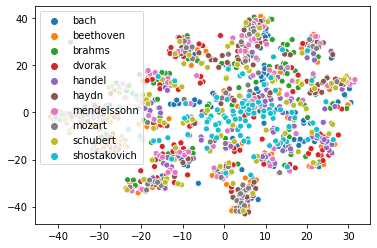

In [136]:
sns.scatterplot(x=X_tsne[:, 0], 
                y=X_tsne[:, 1],
                hue = y.values,
                palette='tab10');

with the NMF

In [137]:
NMF_tsne = tsne.fit_transform(song_topic)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.091s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.339582
[t-SNE] Computed conditional probabilities in 0.049s
[t-SNE] Iteration 50: error = 68.5306549, gradient norm = 0.2444503 (50 iterations in 1.320s)
[t-SNE] Iteration 100: error = 66.7194595, gradient norm = 0.2475666 (50 iterations in 1.764s)
[t-SNE] Iteration 150: error = 66.9017944, gradient norm = 0.2566334 (50 iterations in 1.018s)
[t-SNE] Iteration 200: error = 66.7414246, gradient norm = 0.2514383 (50 iterations in 1.086s)
[t-SNE] Iteration 250: error = 66.7896729, gradient norm = 0.2448978 (50 iterations in 0.953s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.789673
[t-SNE] Iteration 300: error = 0.8930960, gradient norm = 0.0006489 (50 iterations in 0.776s)
[t-SNE] Iteration 350: error = 0.8284738, gradient norm = 0.00028

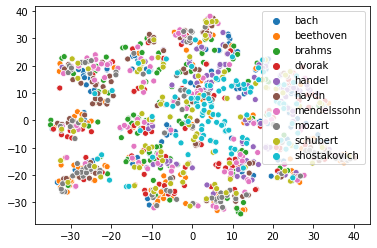

In [138]:
sns.scatterplot(x=NMF_tsne[:, 0], 
                y=NMF_tsne[:, 1],
                hue = y.values,
                palette='tab10');

With the n-grams

In [160]:
NMF_ngram_tsne = tsne.fit_transform(n_gram_song_topic)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.075s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.813183
[t-SNE] Computed conditional probabilities in 0.041s
[t-SNE] Iteration 50: error = 68.3574219, gradient norm = 0.2574889 (50 iterations in 1.153s)
[t-SNE] Iteration 100: error = 66.3285141, gradient norm = 0.2453059 (50 iterations in 0.963s)
[t-SNE] Iteration 150: error = 66.0337524, gradient norm = 0.2604882 (50 iterations in 0.952s)
[t-SNE] Iteration 200: error = 66.4105148, gradient norm = 0.2373576 (50 iterations in 0.724s)
[t-SNE] Iteration 250: error = 66.2693558, gradient norm = 0.2473952 (50 iterations in 0.612s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.269356
[t-SNE] Iteration 300: error = 0.8275720, gradient norm = 0.0006914 (50 iterations in 0.462s)
[t-SNE] Iteration 350: error = 0.7670400, gradient norm = 0.00024

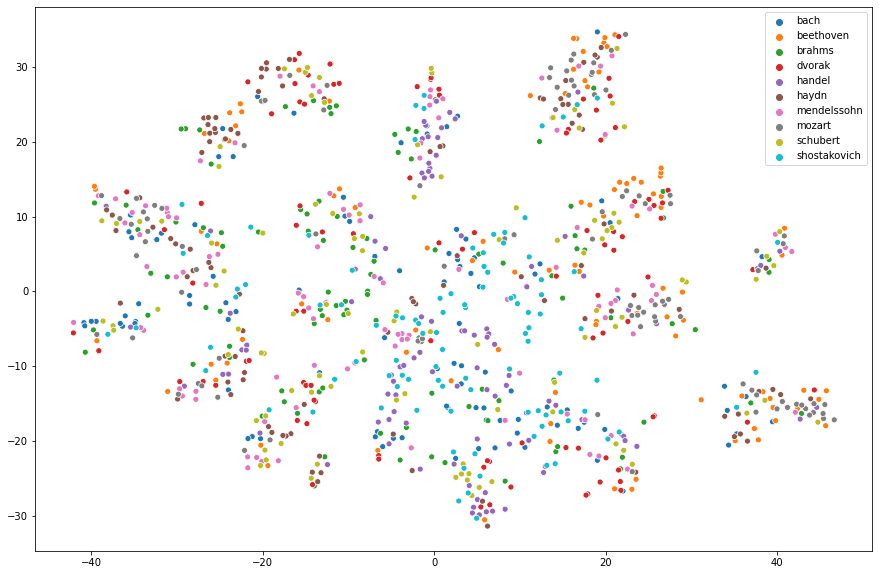

In [195]:
plt.figure(figsize=(15, 10))
ngram_y = composers_chords_full.composer
sns.scatterplot(x=NMF_ngram_tsne[:, 0], 
                y=NMF_ngram_tsne[:, 1],
                hue = ngram_y.values,
                palette='tab10');

In [196]:
ngram_topics = ngram_plot_topic_df.Topic

In [197]:
ngram_topics.values

array(['', '', '', '', '', '', '', '', '', '', 'C Maj', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', 'C Maj', 'C Maj', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', 'C Maj', 'C Maj', 'C Maj', 'C Maj', 'C Maj', 'G Maj',
       '', '', '', '', '', '', '', 'A Maj', '', '', '', '', '', '', '',
       '', '', 'A Maj', '', '', '', '', '', '', '', '', '', '', '',
       'C Maj', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', 'C Maj', '', '', '', 'G Maj', '', 'C Maj', 'A Maj', '', '',
       '', '', '', '', '', '', '', 'C Maj', '', '', '', '', '', 'C Maj',
       '', 'C Maj', '', '', '', '', '', '', 'C Maj', '', 'G Maj', 'C Maj',
       'C Maj', '', '', 'C Maj', '', '', 'C Maj', 'C Maj', '', '', '', '',
       '', '', '', 'A Maj', 'C Maj', '', 'G Maj', '', '', '', 'C Maj', '',
       'C Maj', 'C Maj', '', 'C Maj', '', '', '', '', '', '', '', 'A Maj',
       '', '', '', '', '', 'A Maj', 'C Maj', 'A

In [198]:
ngram_topics

0           
1           
2           
3           
4           
       ...  
995    A Maj
996         
997         
998         
999         
Name: Topic, Length: 1000, dtype: object

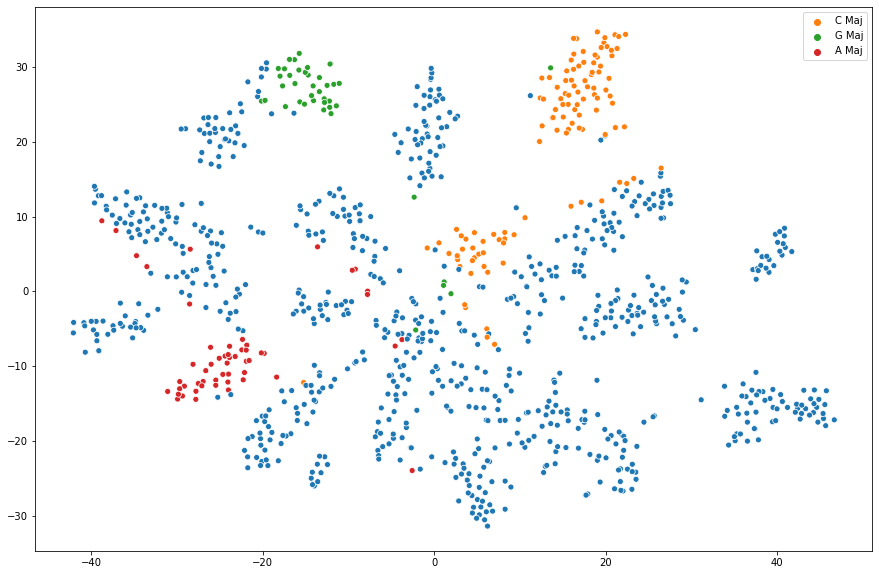

In [199]:

plt.figure(figsize=(15, 10))
sns.scatterplot(x=NMF_ngram_tsne[:, 0], 
                y=NMF_ngram_tsne[:, 1],
                hue = ngram_topics.values);

### Topic  looks like d maj, so lets just look at that

In [141]:
dmaj = ngram_plot_topic_df[ngram_plot_topic_df.Topic == 1]
dmaj

,track,chords,composer,Topic,Confidence
19,01_bach/CrossComp-0050_01_bach_5_bwv_874_in_dm...,N D_maj D_maj D_maj D_maj D_maj D_maj D_maj D_...,bach,1,2.692558
64,01_bach/CrossComp-0017_01_bach_ouverture_no._3...,N D_maj D_maj A_maj_min7 D_maj D_maj D_maj D_m...,bach,1,2.812666
66,01_bach/CrossComp-0019_01_bach_ouverture_no._3...,N D_maj D_maj B_min G_maj G_maj A_maj_min7 A_m...,bach,1,2.767486
68,01_bach/CrossComp-0021_01_bach_ouverture_no._4...,N D_maj D_maj D_maj D_maj D_maj D_maj D_maj D_...,bach,1,2.444475
69,01_bach/CrossComp-0022_01_bach_ouverture_no._4...,N B_min_min7 B_min_min7 B_min_min7 E_min F#_mi...,bach,1,1.288265
...,...,...,...,...,...
927,11_shostakovich/CrossComp-1068_11_shostakovich...,N D_maj D_maj D_maj D_maj D_maj D_maj D_maj D_...,shostakovich,1,0.756817
951,11_shostakovich/CrossComp-1036_11_shostakovich...,N D_maj D_maj D_maj A_maj_min7 D_maj_maj7 D_ma...,shostakovich,1,1.571600
975,11_shostakovich/CrossComp-1089_11_shostakovich...,N G_min F_maj_min7 F_maj_min7 D_min D_min D_mi...,shostakovich,1,1.644239
977,11_shostakovich/CrossComp-1076_11_shostakovich...,N N F#_maj G_maj G_maj G_maj G_maj G_maj B_min...,shostakovich,1,2.630806


In [142]:
dmaj_data = dmaj.chords

dmaj_cv = cv.fit_transform(dmaj_data)

dmaj_df = pd.DataFrame(dmaj_cv.toarray(), columns = cv.get_feature_names())

In [143]:
dmaj_tsne = tsne.fit_transform(dmaj_df)

[t-SNE] Computing 85 nearest neighbors...
[t-SNE] Indexed 86 samples in 0.001s...
[t-SNE] Computed neighbors for 86 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 86 / 86
[t-SNE] Mean sigma: 52.615793
[t-SNE] Computed conditional probabilities in 0.009s
[t-SNE] Iteration 50: error = 56.7532501, gradient norm = 0.4293964 (50 iterations in 0.036s)
[t-SNE] Iteration 100: error = 54.1375580, gradient norm = 0.5228024 (50 iterations in 0.035s)
[t-SNE] Iteration 150: error = 59.4120064, gradient norm = 0.5204448 (50 iterations in 0.034s)
[t-SNE] Iteration 200: error = 56.3165054, gradient norm = 0.5094061 (50 iterations in 0.053s)
[t-SNE] Iteration 250: error = 58.4818115, gradient norm = 0.4695888 (50 iterations in 0.084s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.481812
[t-SNE] Iteration 300: error = 1.0821251, gradient norm = 0.0076498 (50 iterations in 0.053s)
[t-SNE] Iteration 350: error = 0.6699128, gradient norm = 0.0033226 (50 

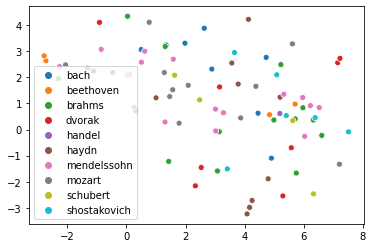

In [144]:
dmaj_y = dmaj.composer
sns.scatterplot(x=dmaj_tsne[:, 0], 
                y=dmaj_tsne[:, 1],
                hue = dmaj_y.values,
                palette='tab10');

# Word to Vec Modeling

In [145]:
documents = df.chords
texts = [[word for word in document.lower().split()]
         for document in documents]

In [146]:
texts

[['e_min',
  'e_min',
  'e_min',
  'e_min',
  'b_maj_min7',
  'b_maj_min7',
  'b_maj_min7',
  'e_min_min7',
  'e_min_min7',
  'e_min_min7',
  'e_min_min7',
  'e_min_min7',
  'e_min_min7',
  'e_min_min7',
  'e_min_min7',
  'e_min_min7',
  'e_min_min7',
  'g_maj_maj7',
  'g_maj_maj7',
  'g_maj_maj7',
  'g_maj_maj7',
  'g_maj_maj7',
  'a_min_min7',
  'a_min_min7',
  'a_min_min7',
  'a_min_min7',
  'a_min_min7',
  'a_min_min7',
  'e_maj_min7',
  'e_maj_min7',
  'e_maj_min7',
  'e_maj_min7',
  'e_maj_min7',
  'g_maj_maj7',
  'g_maj_maj7',
  'g_maj_maj7',
  'g_maj_maj7',
  'g_maj_maj7',
  'g_maj_maj7',
  'c_maj_maj7',
  'c_maj_maj7',
  'c_maj_maj7',
  'c_maj_maj7',
  'e_maj_min7',
  'f#_maj_min7',
  'f#_maj_min7',
  'f#_maj_min7',
  'f#_maj_min7',
  'f#_maj_min7',
  'f#_maj_min7',
  'f#_maj_min7',
  'c#_maj_min7',
  'c#_maj_min7',
  'bb_dim_dim7',
  'bb_dim_dim7',
  'g_maj_maj7',
  'c#_min_min7',
  'c#_min_min7',
  'e_min',
  'e_min',
  'e_min',
  'b_maj_min7',
  'b_maj_min7',
  'b_maj_min7'

In [147]:
import gensim  # using skip-gram
model = gensim.models.Word2Vec(texts, size=100, window=5, min_count=1, workers=2, sg=1)

In [148]:
# take a look at vocab
list(model.wv.vocab.items())[:7]

[('e_min', <gensim.models.keyedvectors.Vocab at 0x7fd8fee3c190>),
 ('b_maj_min7', <gensim.models.keyedvectors.Vocab at 0x7fd8781a6d60>),
 ('e_min_min7', <gensim.models.keyedvectors.Vocab at 0x7fd8781a6ca0>),
 ('g_maj_maj7', <gensim.models.keyedvectors.Vocab at 0x7fd8783e5c40>),
 ('a_min_min7', <gensim.models.keyedvectors.Vocab at 0x7fd8784549d0>),
 ('e_maj_min7', <gensim.models.keyedvectors.Vocab at 0x7fd878454a30>),
 ('c_maj_maj7', <gensim.models.keyedvectors.Vocab at 0x7fd878454a90>)]

In [149]:
model.wv.most_similar('a_maj' ,topn=8)

[('d_maj', 0.8283511400222778),
 ('d_maj_maj7', 0.812467634677887),
 ('b_min_min7', 0.8055339455604553),
 ('a_maj_min7', 0.7905610203742981),
 ('e_maj_min7', 0.7839036583900452),
 ('e_min_min7', 0.7421278953552246),
 ('c#_dim_min7', 0.7247152924537659),
 ('d_min', 0.7132630348205566)]